<a href="https://colab.research.google.com/github/harryguiacorn/Trading-Analysis-Statistics/blob/main/Daily_Return_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance pandas

# Plot daily returns of past number of years horizontally



In [ ]:
import yfinance as yf
import pandas as pd
import plotly.express as px
import os
from datetime import datetime

# Define the S&P 500 ticker symbol
symbol = "^GSPC"

# Define the date range for the past x years
look_back_years = 5
end_year = datetime.today().year - 1
start_year = end_year - look_back_years
start_date = datetime(start_year, 1, 1)
end_date = datetime(end_year, 12, 31)

print(end_year, start_year)
# Download historical data from Yahoo Finance
data_yf = yf.download(symbol, start=start_date, end=end_date)

# Calculate daily returns
data_yf['Daily_Return'] = data_yf['Adj Close'].pct_change()

# Extract the year from the date
data_yf['Year'] = data_yf.index.year
print(data_yf.index)

# Create an interactive chart with each year's returns as separate lines
fig = px.line(data_yf, x=data_yf.index, y='Daily_Return', title=f'S&P 500 Daily Returns ({start_date.year}-{end_year})',
              color='Year', labels={'Daily_Return': 'Daily Return'})
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Daily Return')

fig.show()

# Create a list to store the data for each year
yearly_data = []

# Loop through each year and download data
for year in range(start_year, end_year + 1):
    # Drop the first row (NaN due to no previous day's data)
    data_yf = data_yf.dropna()

    # Append the data to the yearly_data list
    yearly_data.append(data_yf)

print("Data downloaded and saved successfully.")

def save_csv_to_folder(folder_path, filename, data, index=True):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    file_path = os.path.join(folder_path, filename)
    data.to_csv(file_path, index=index)

# Save each year's data to individual CSV files
for year, data in zip(range(start_year, end_year + 1), yearly_data):
    save_csv_to_folder(f'{symbol} daily return', f'{symbol}_{year}_Daily_Return.csv', data_yf)


2022 2017
[*********************100%%**********************]  1 of 1 completed
DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='Date', length=1510, freq=None)


Data downloaded and saved successfully.


# Plot daily returns by year

[*********************100%%**********************]  1 of 1 completed


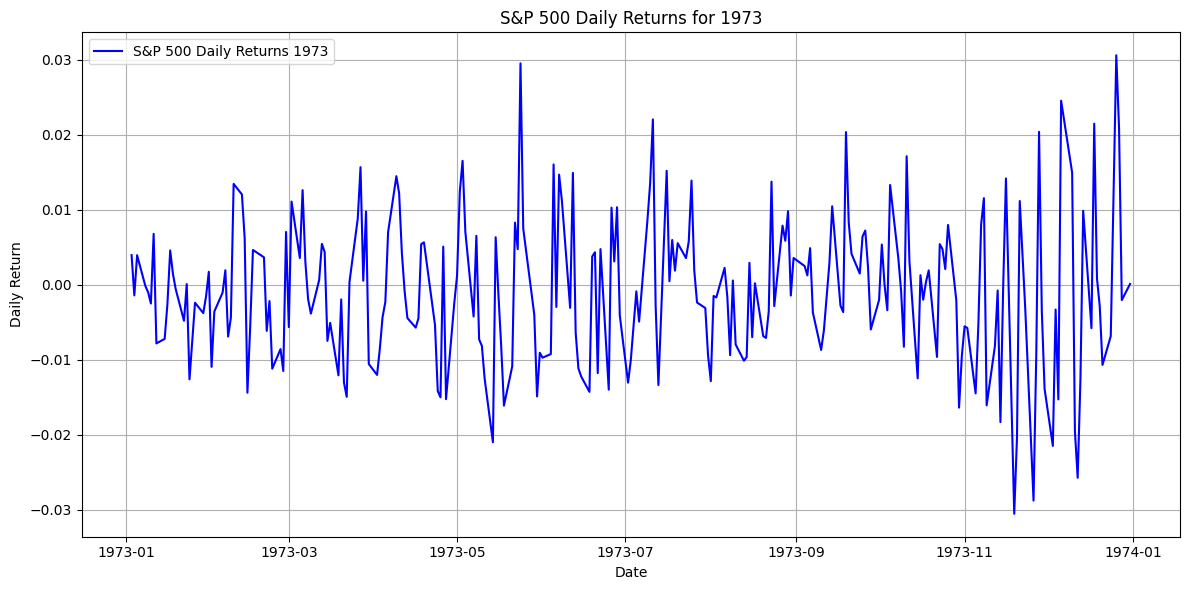

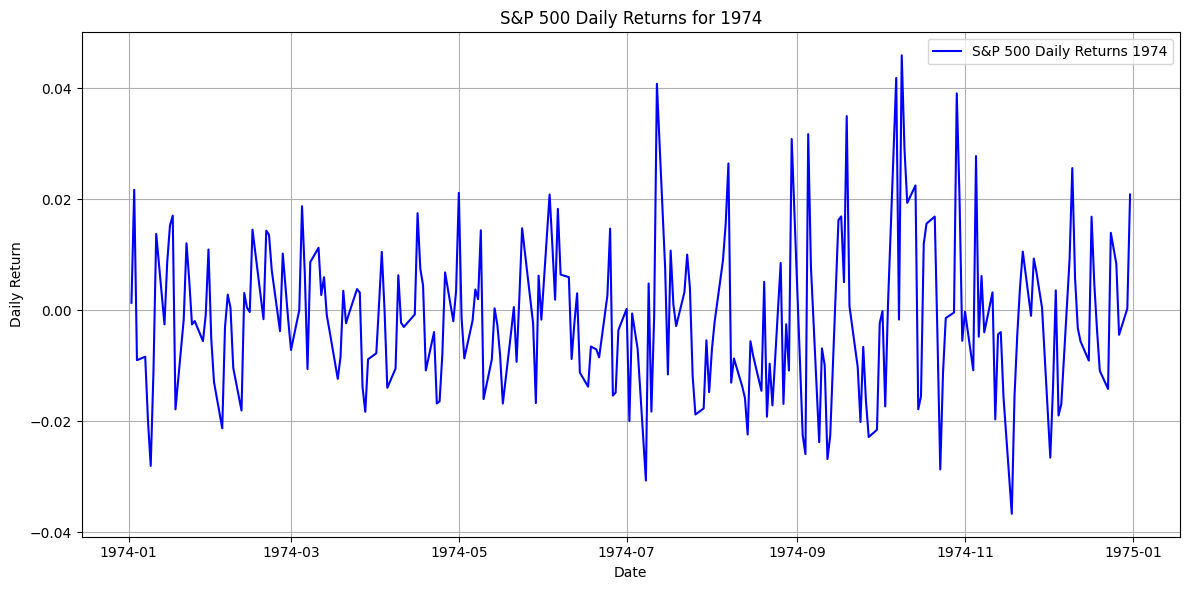

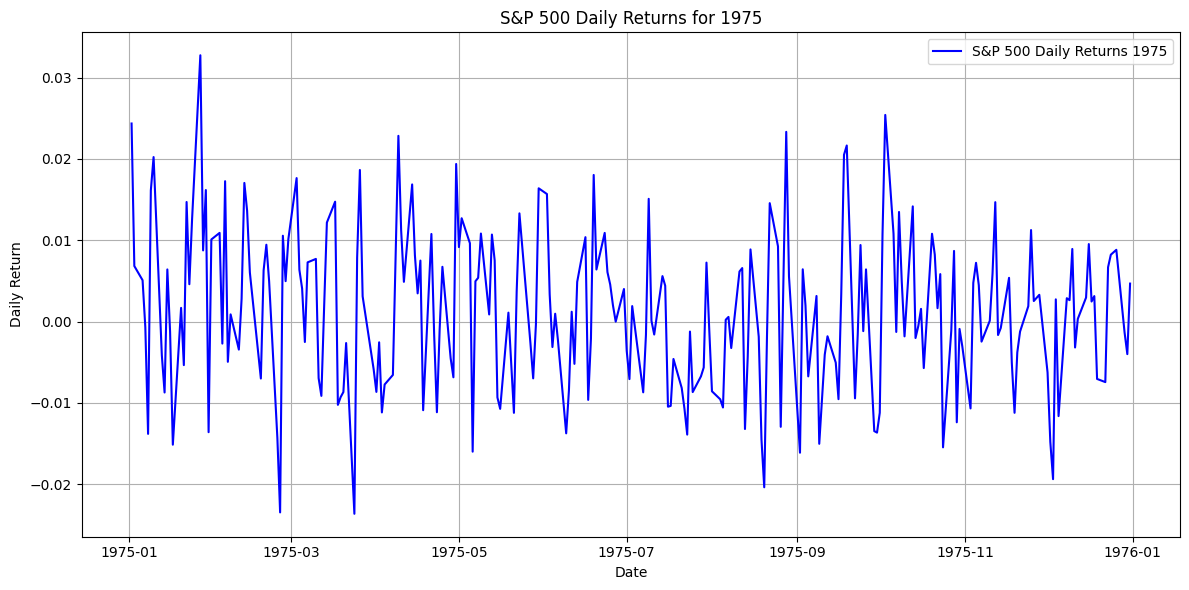

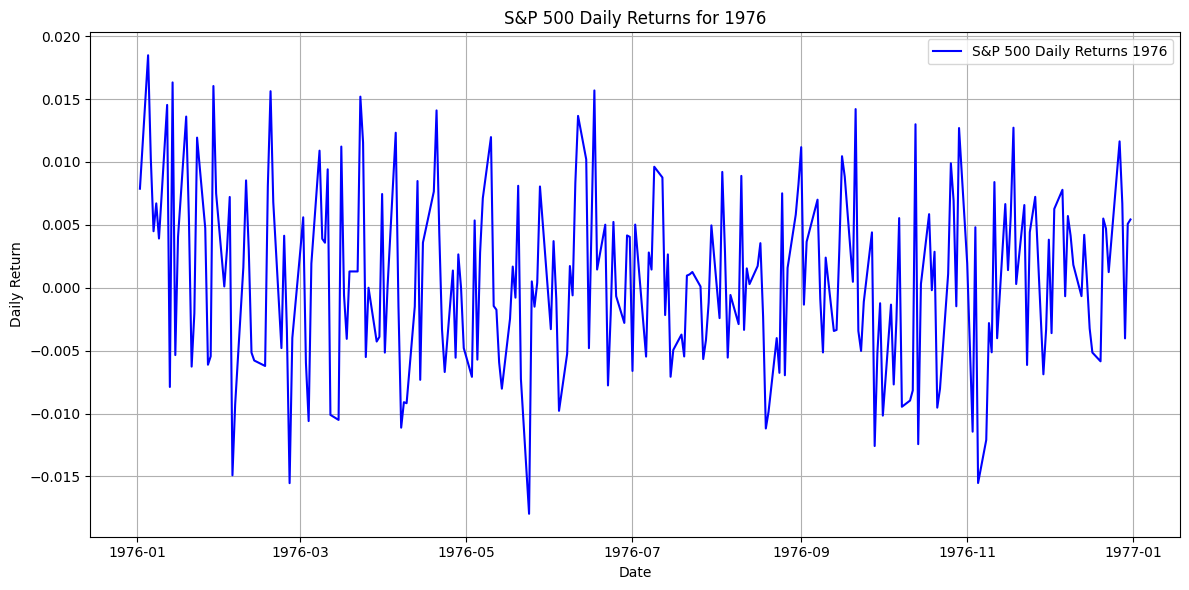

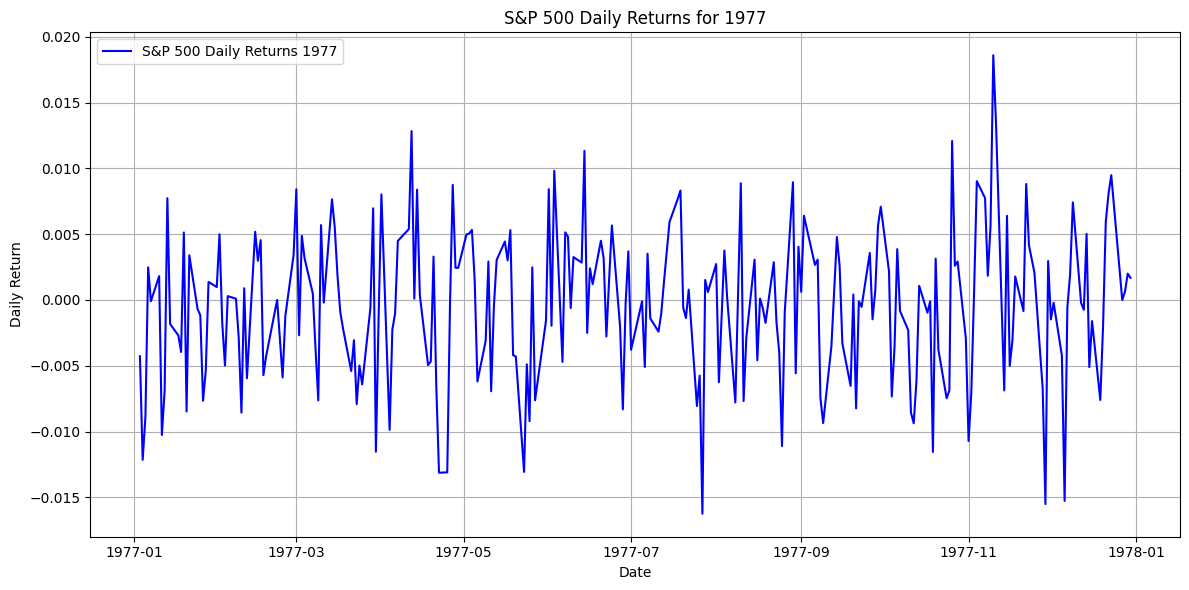

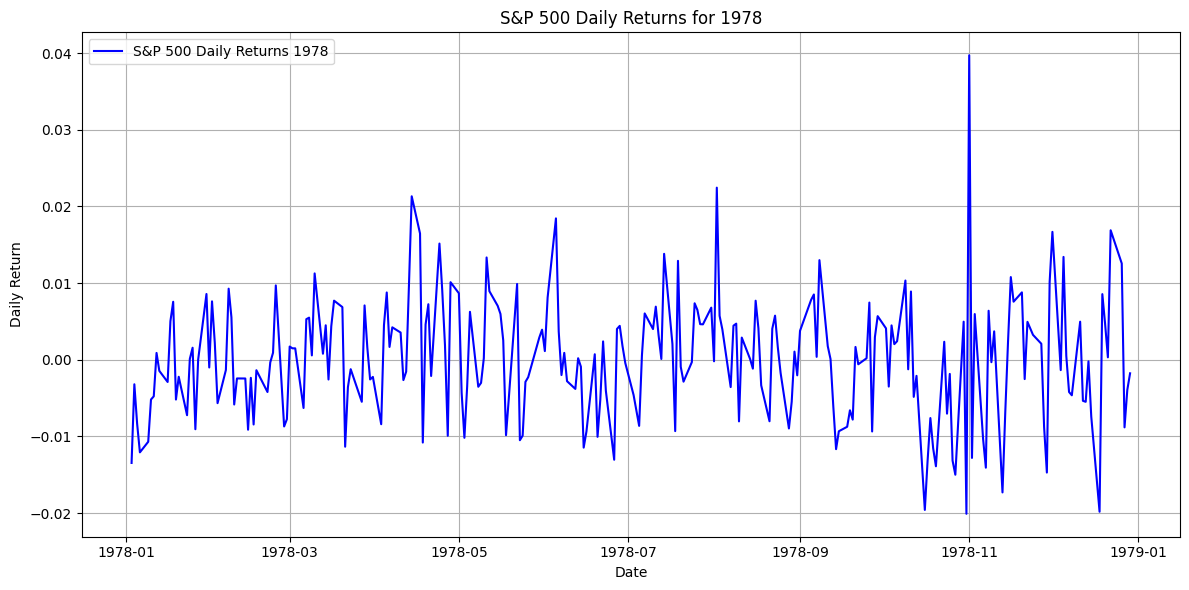

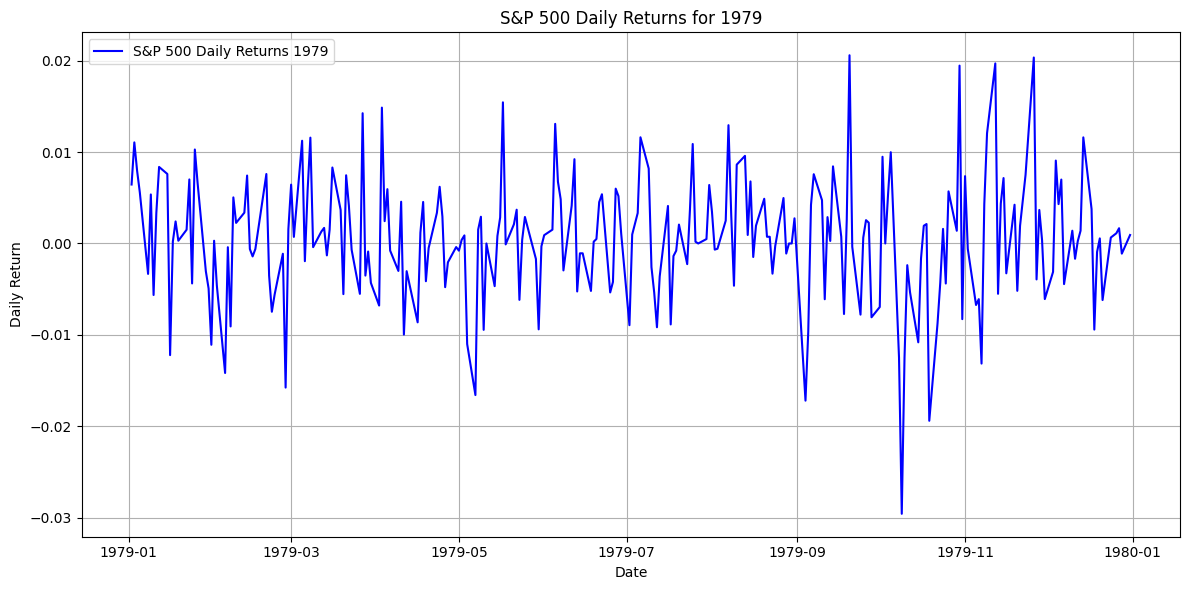

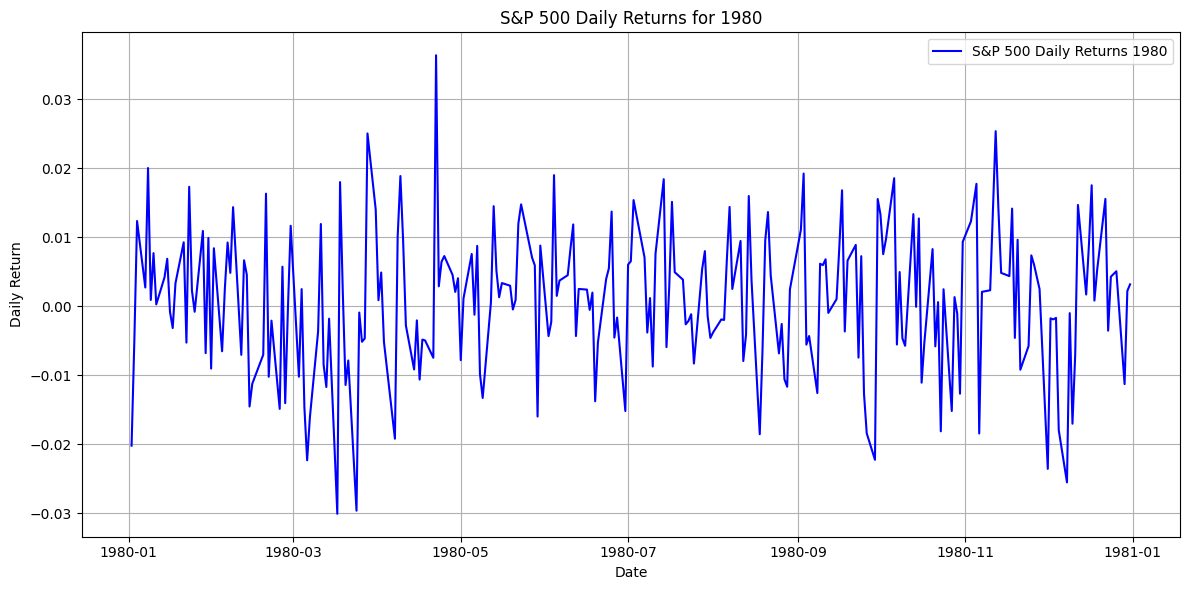

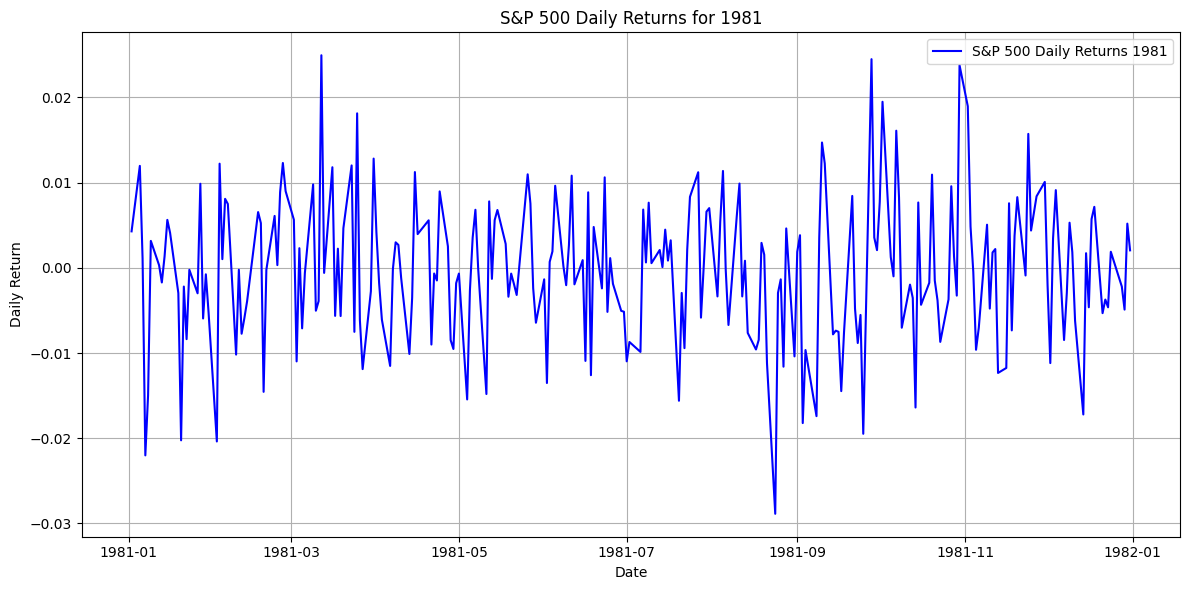

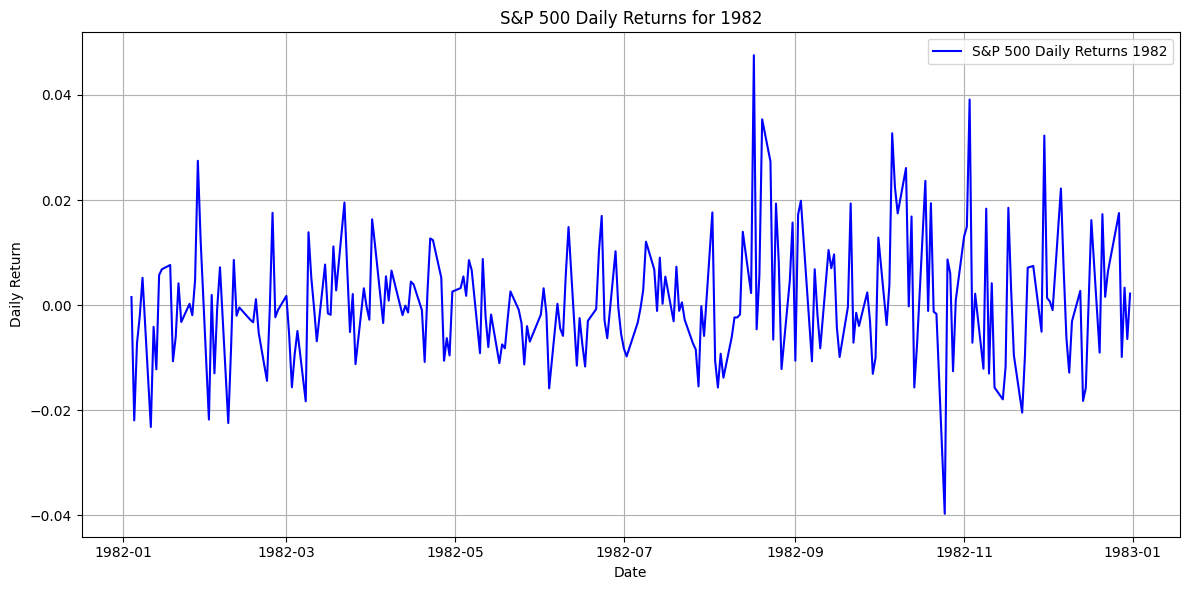

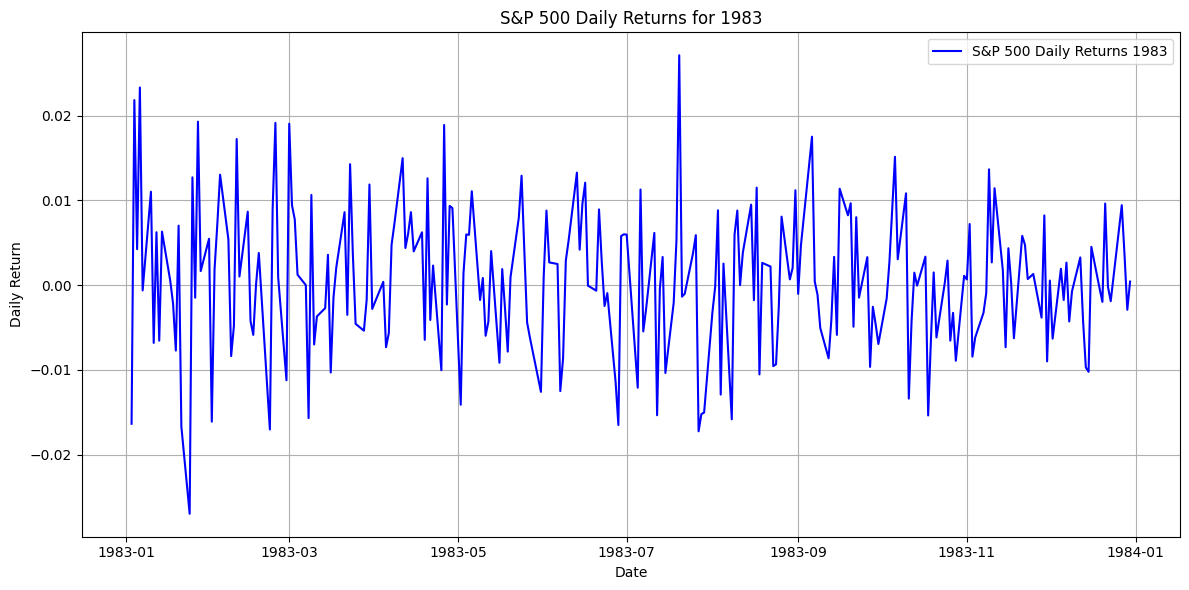

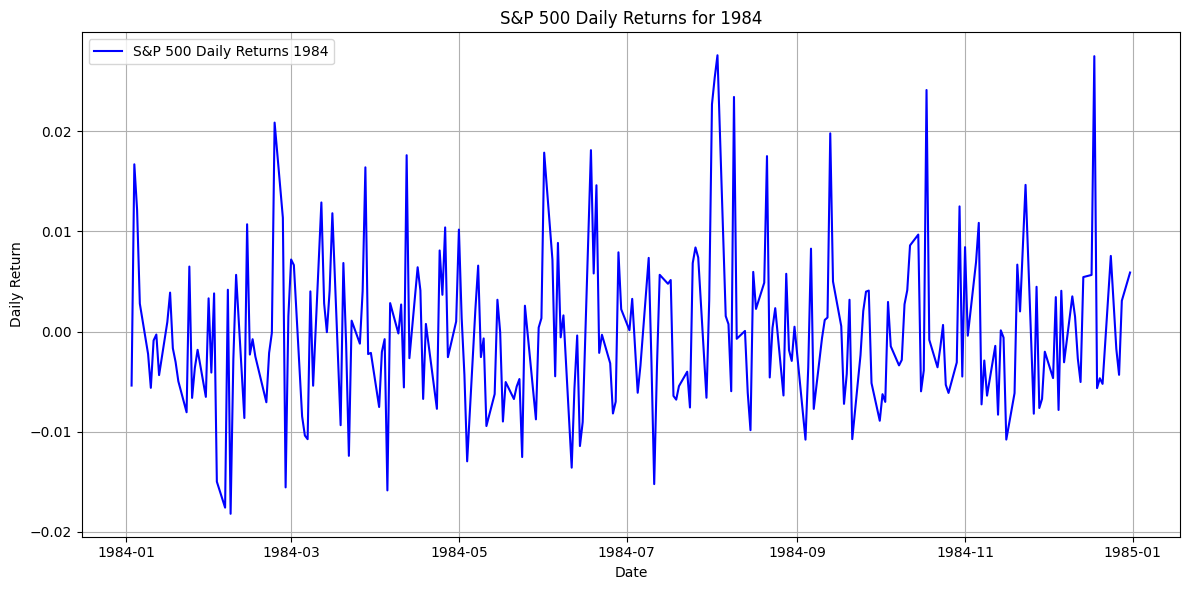

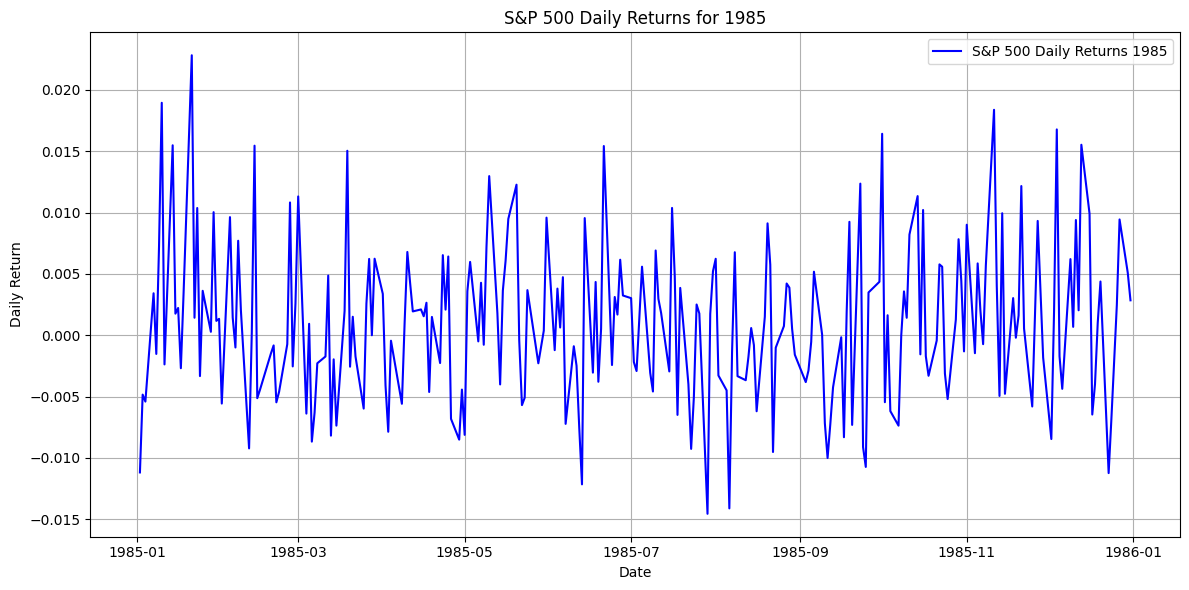

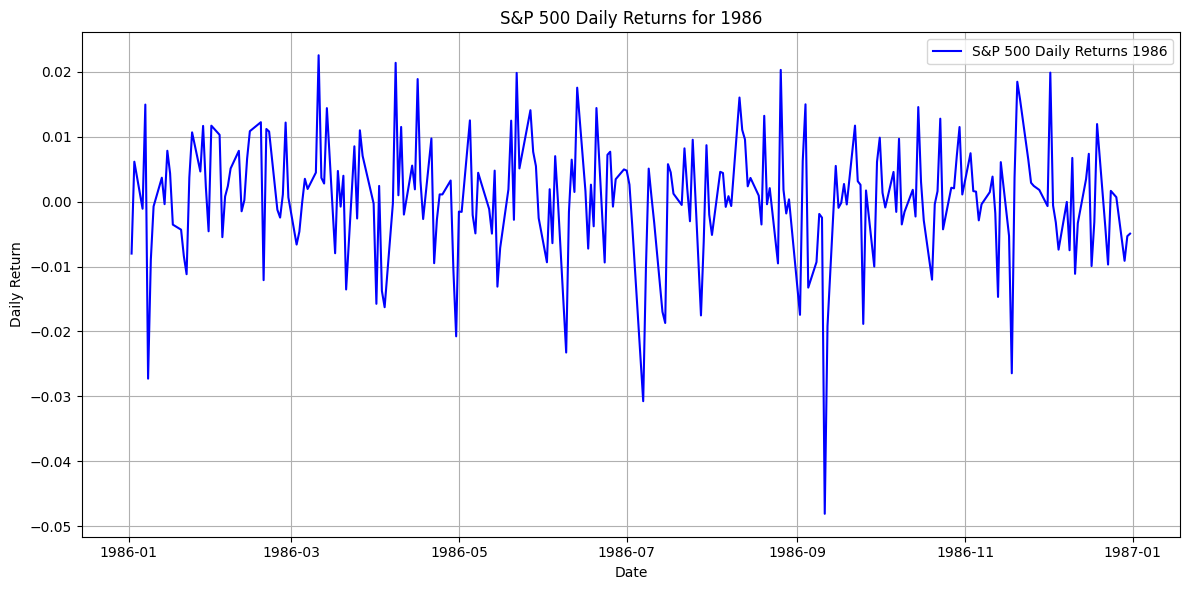

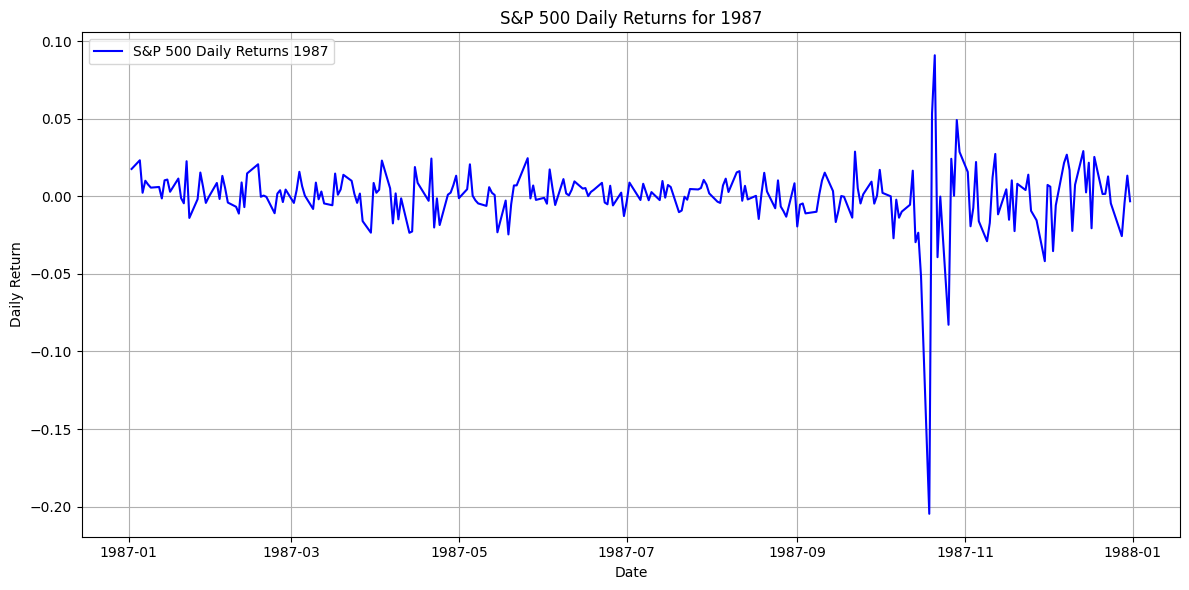

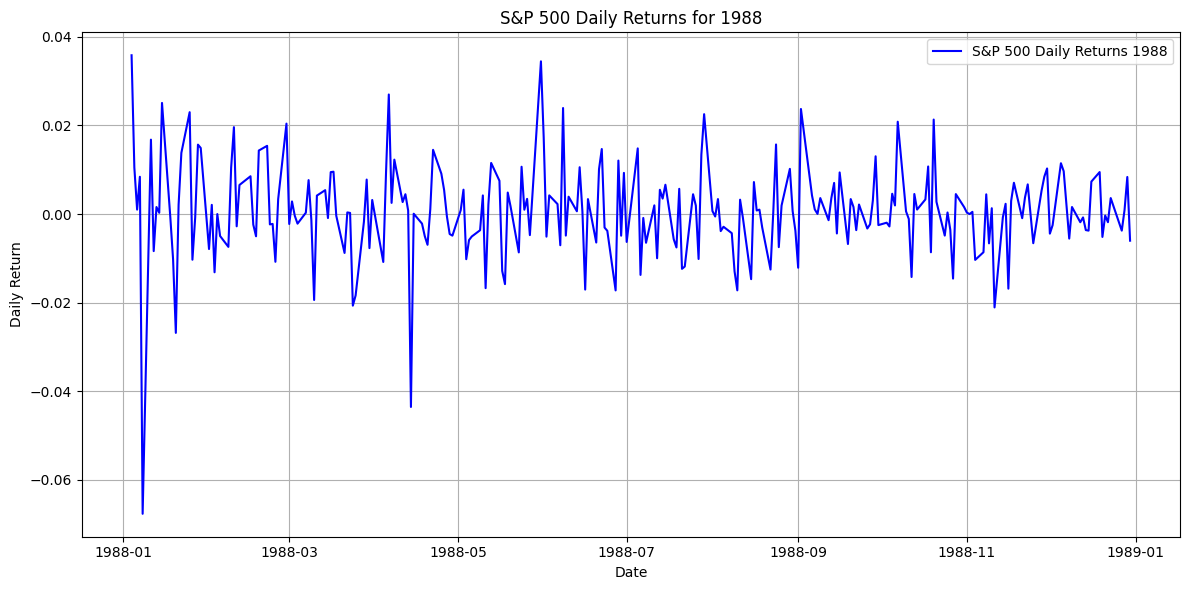

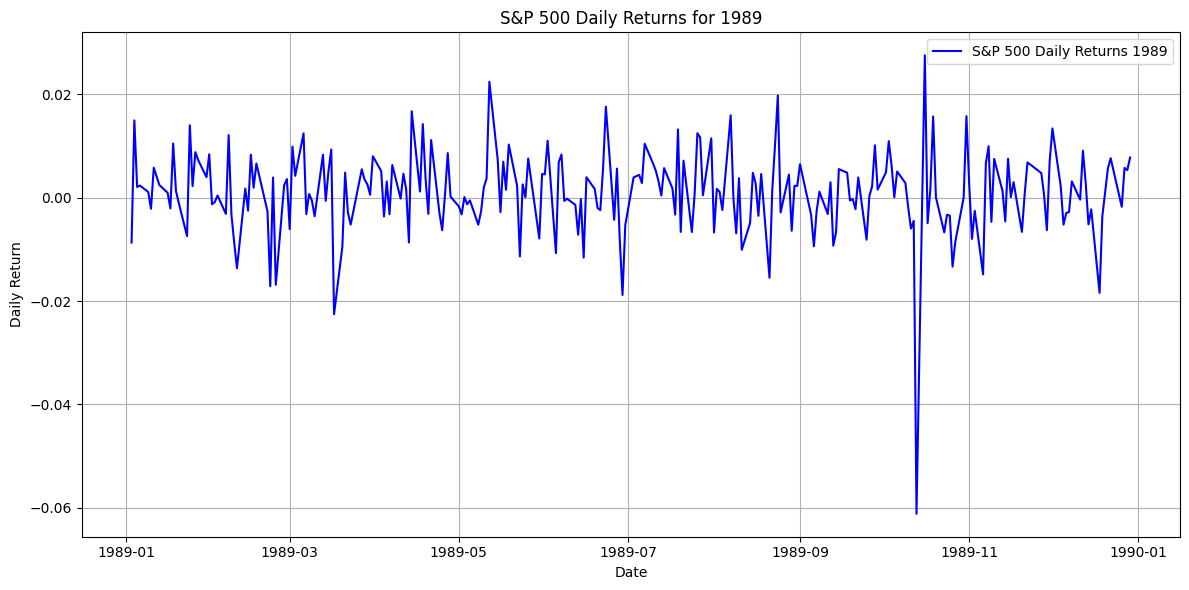

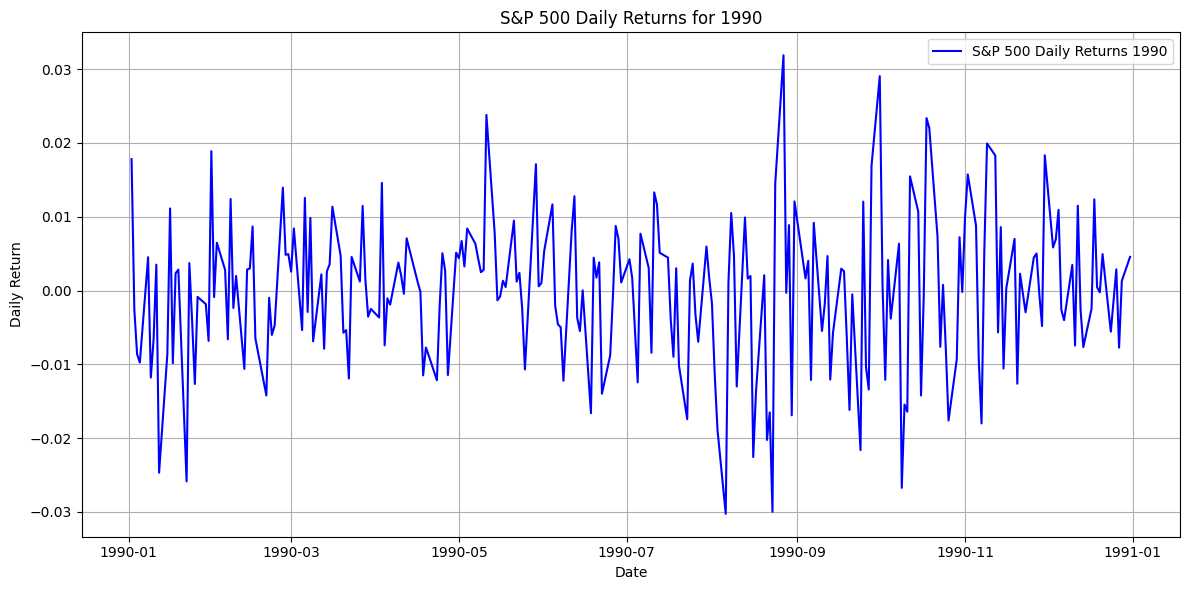

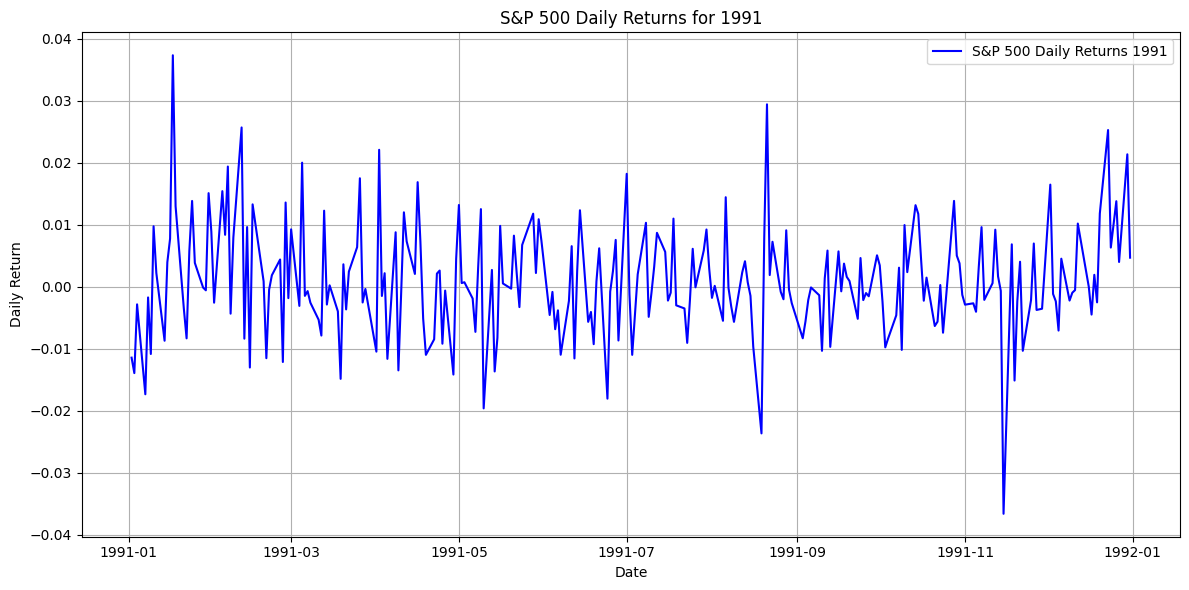

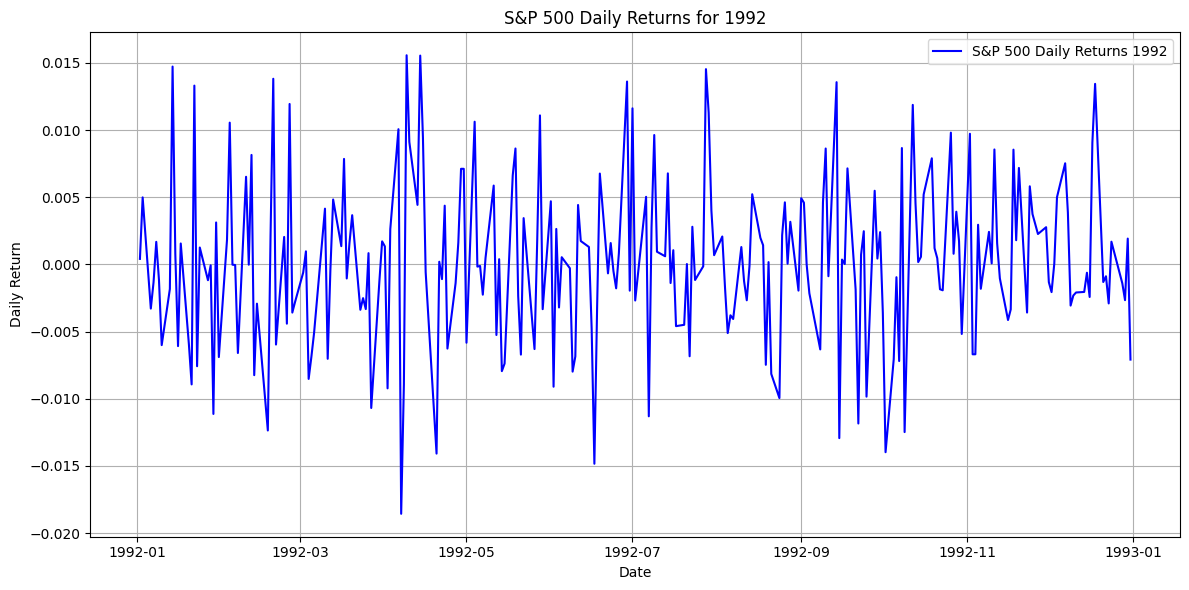

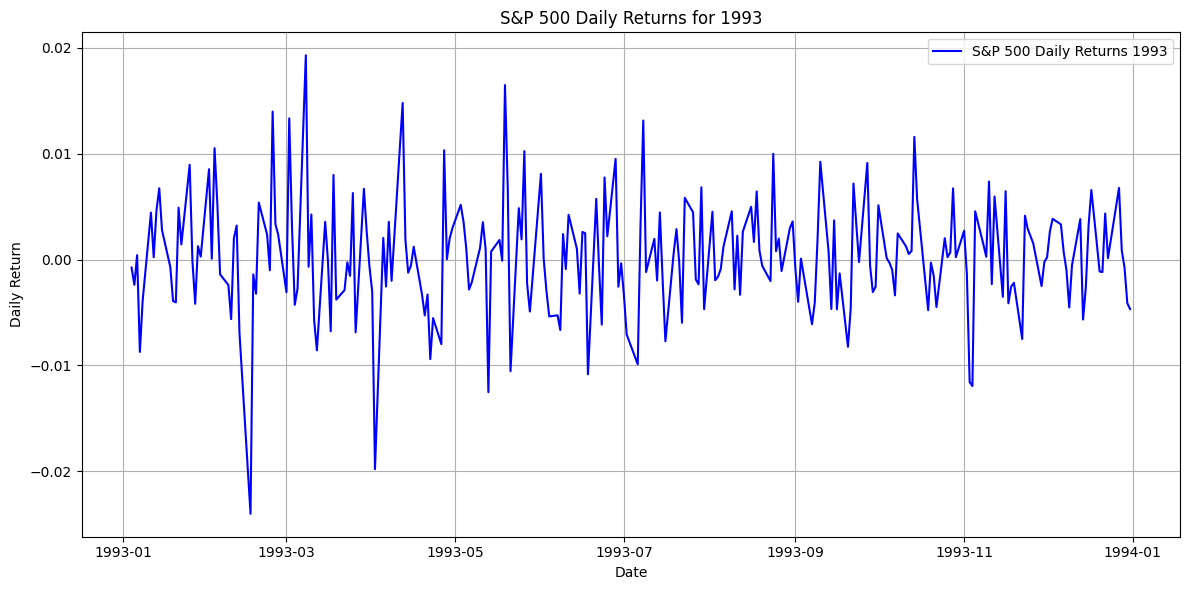

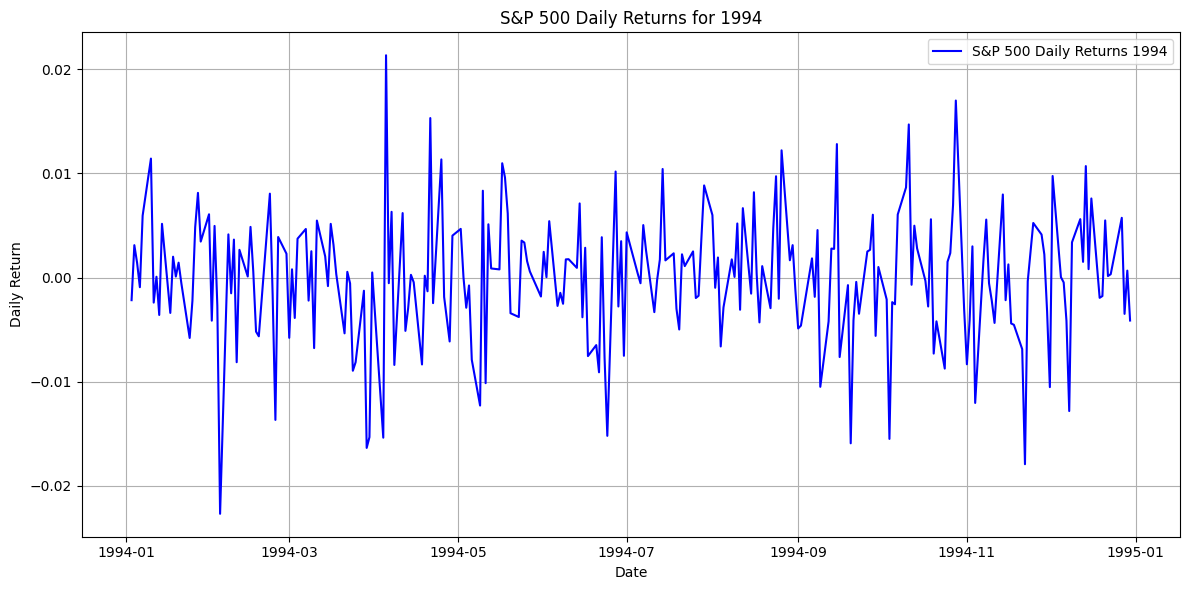

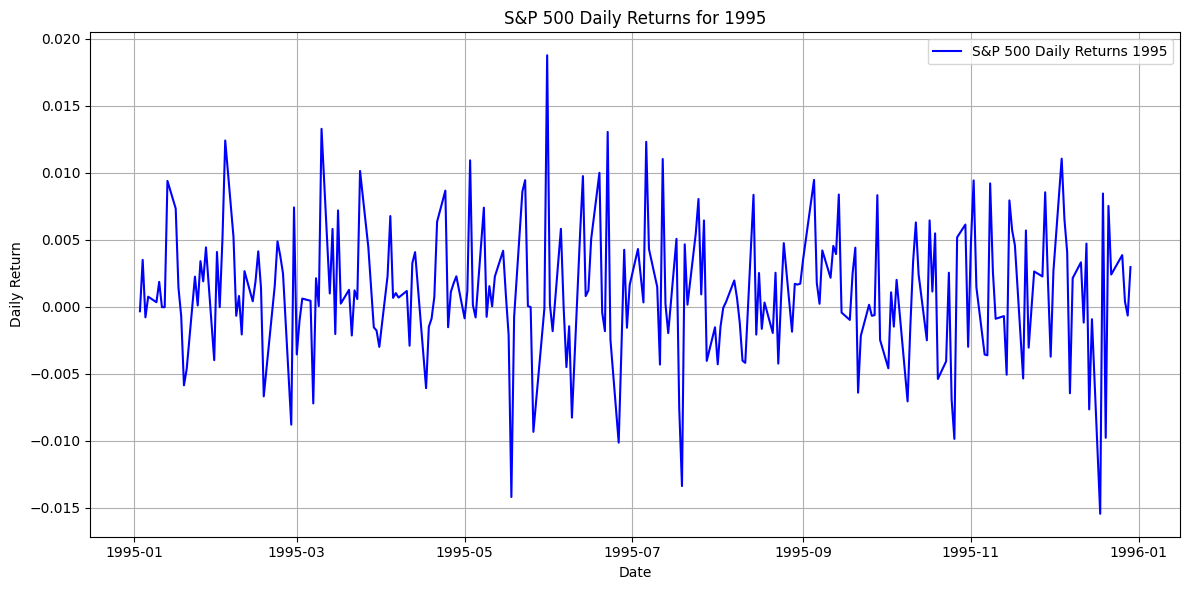

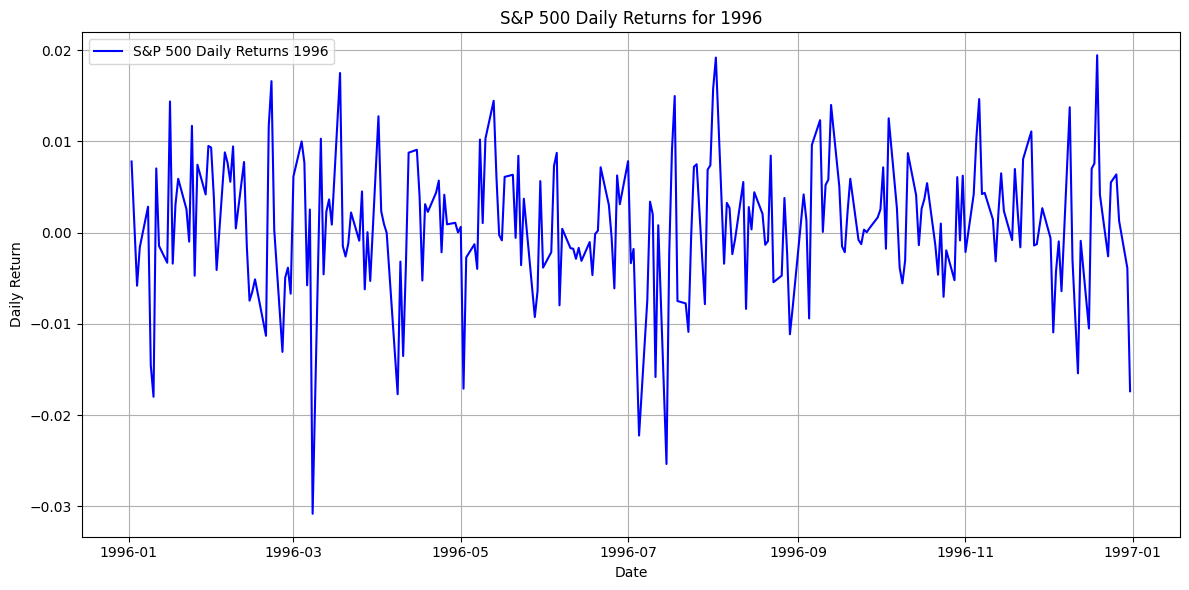

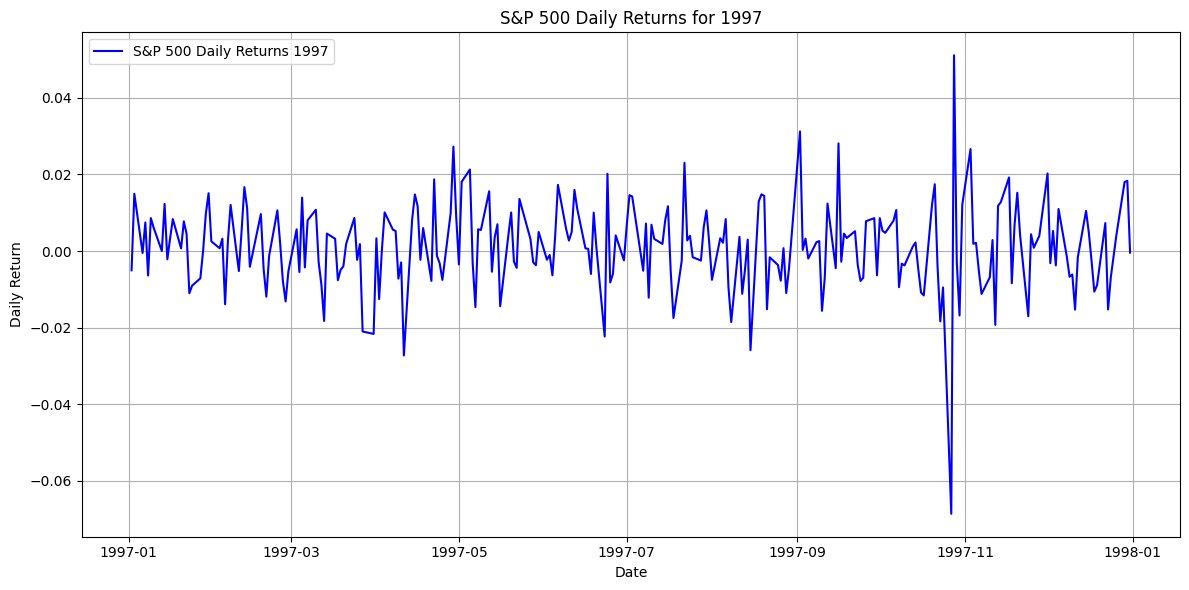

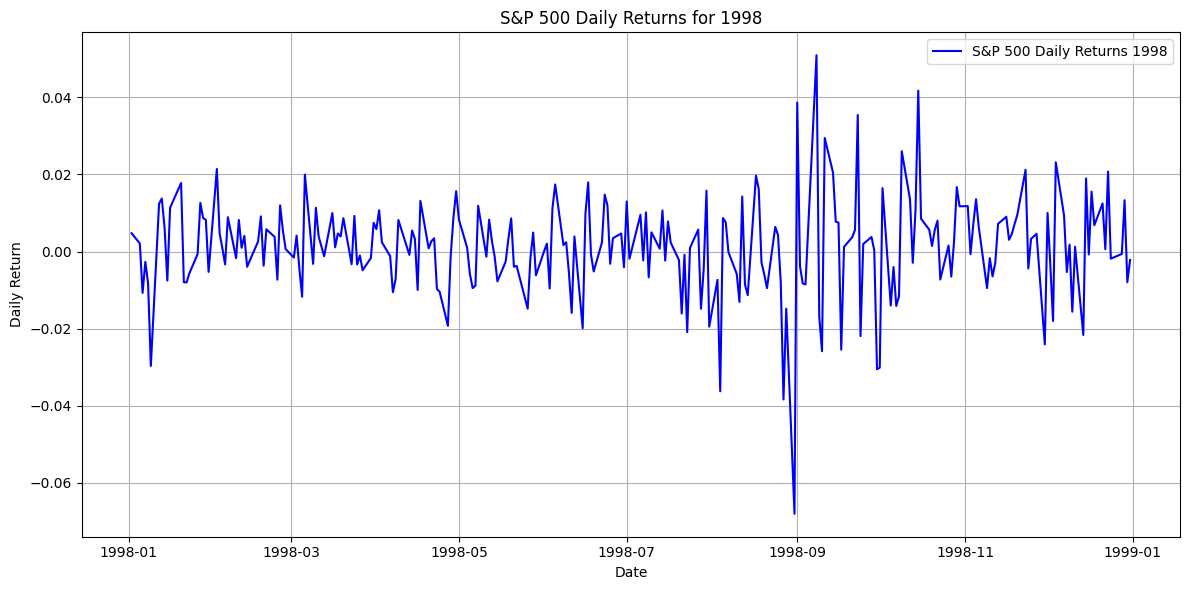

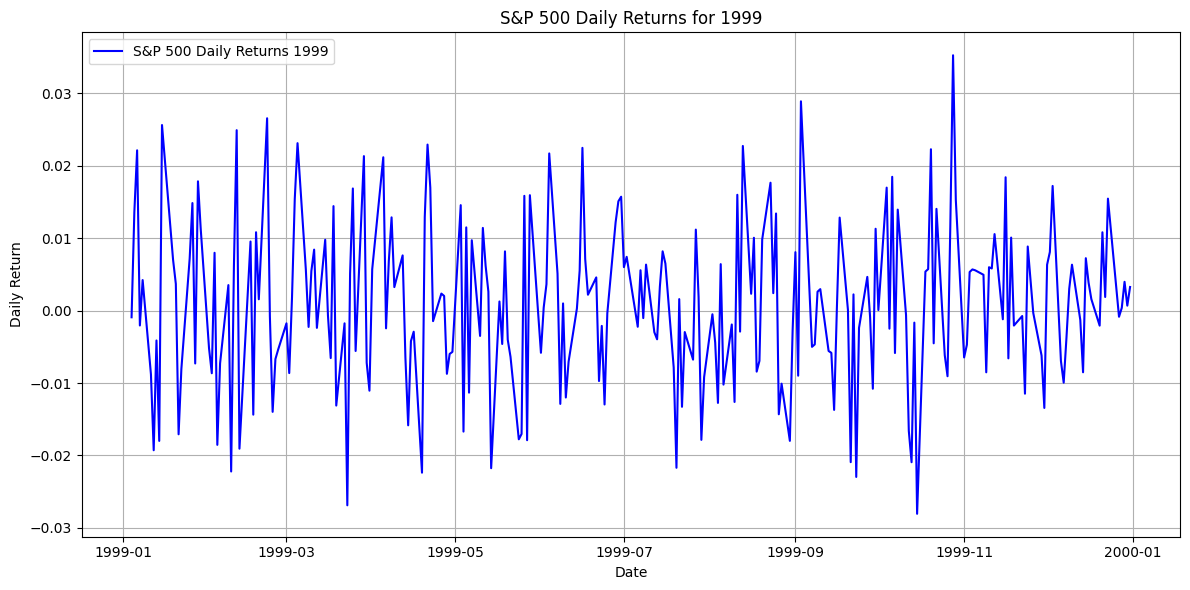

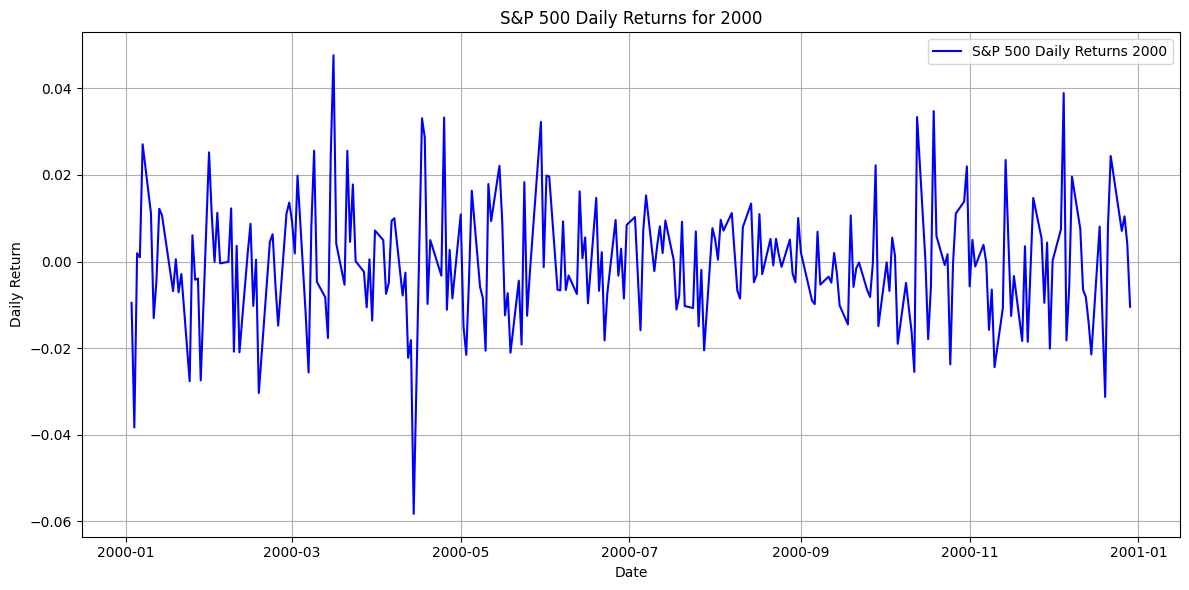

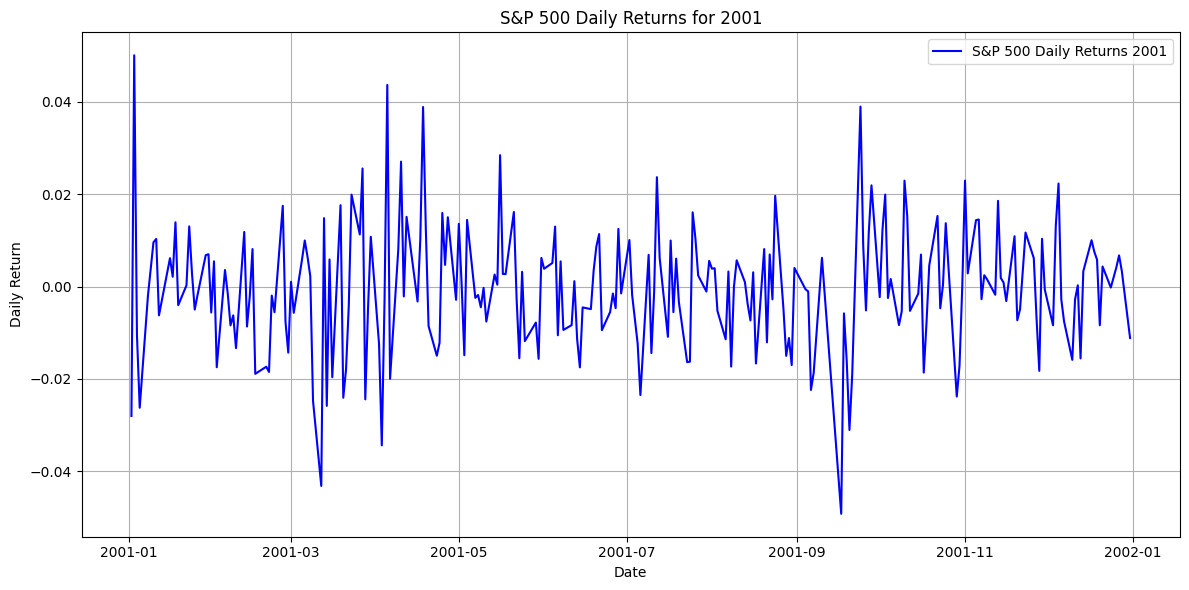

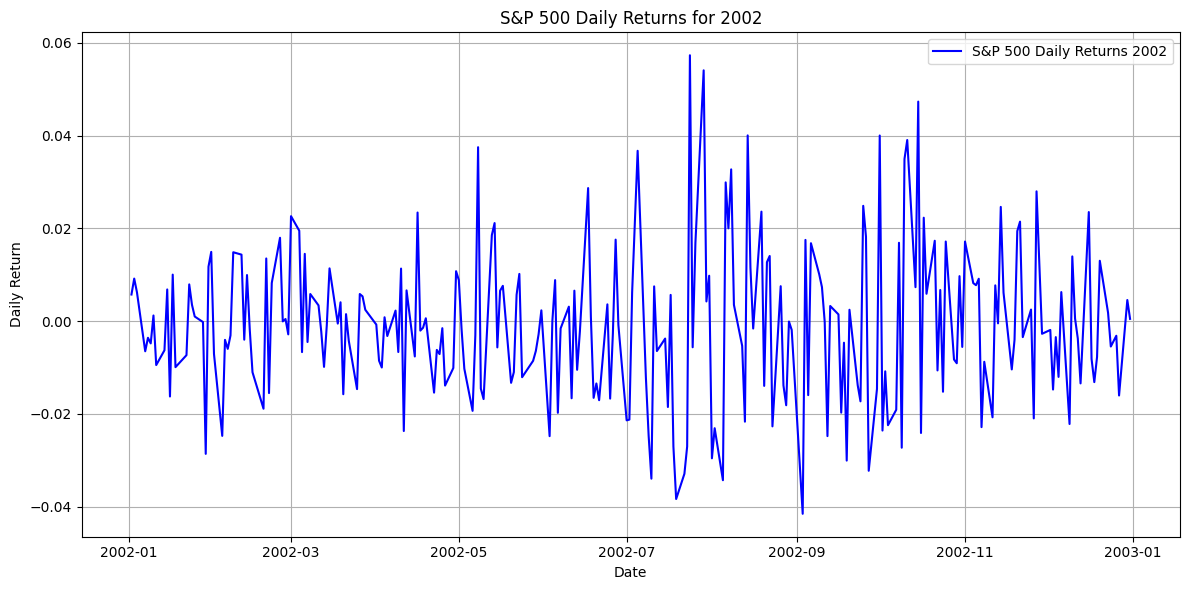

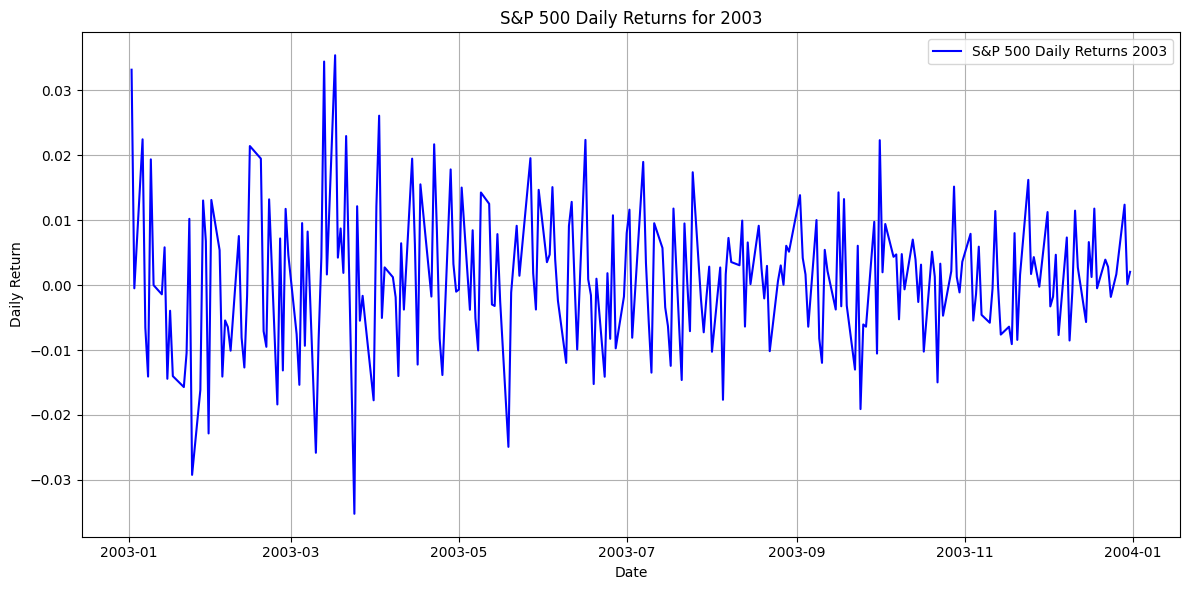

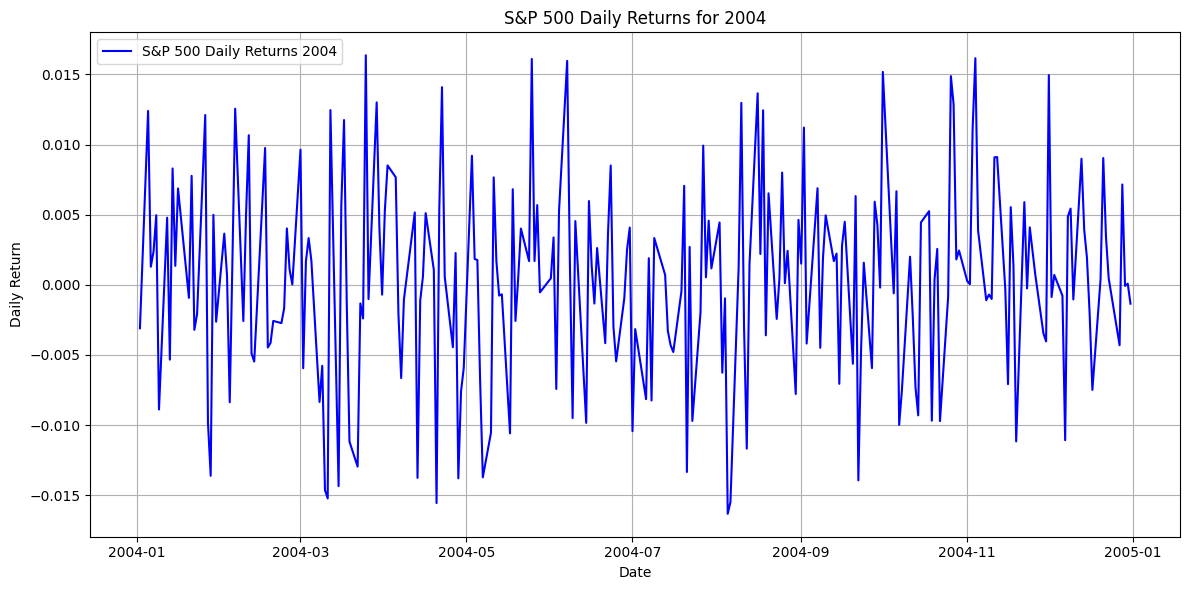

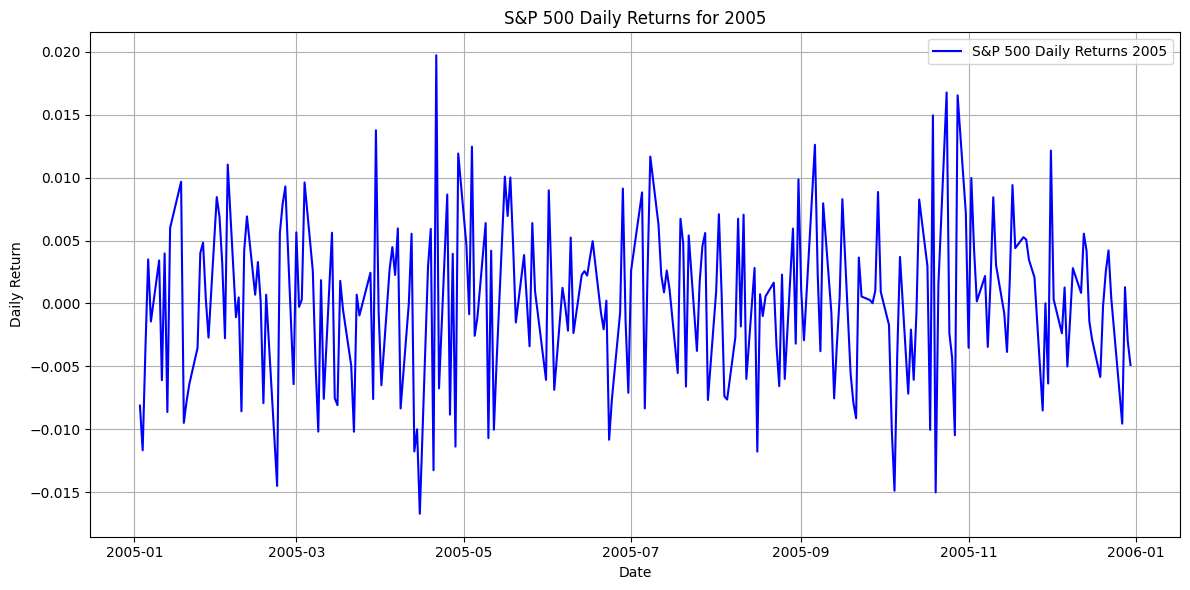

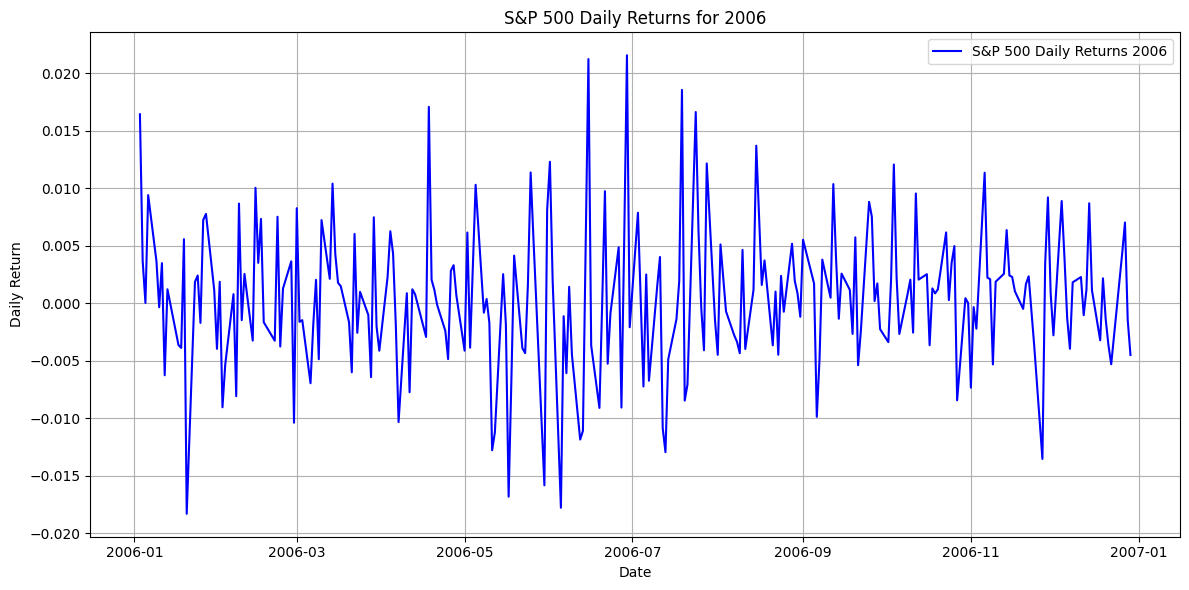

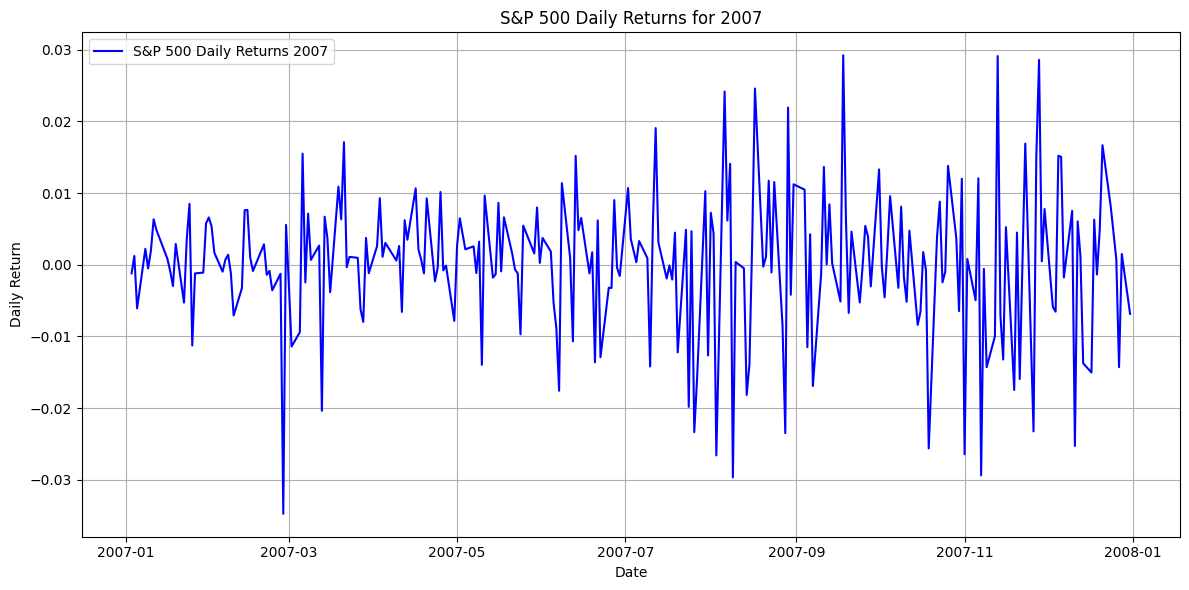

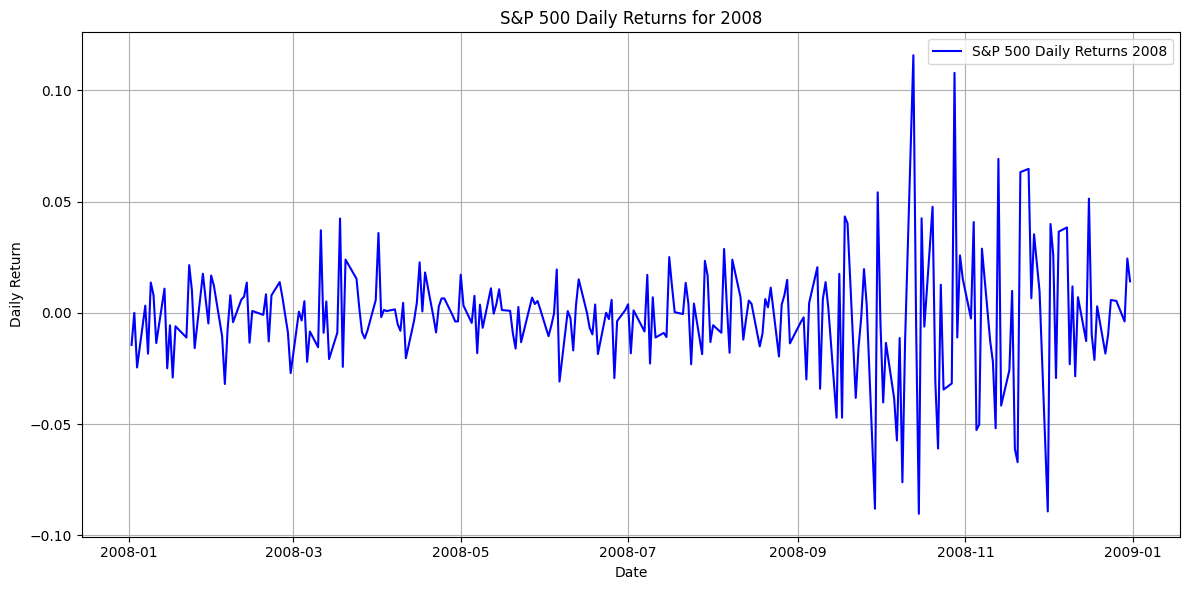

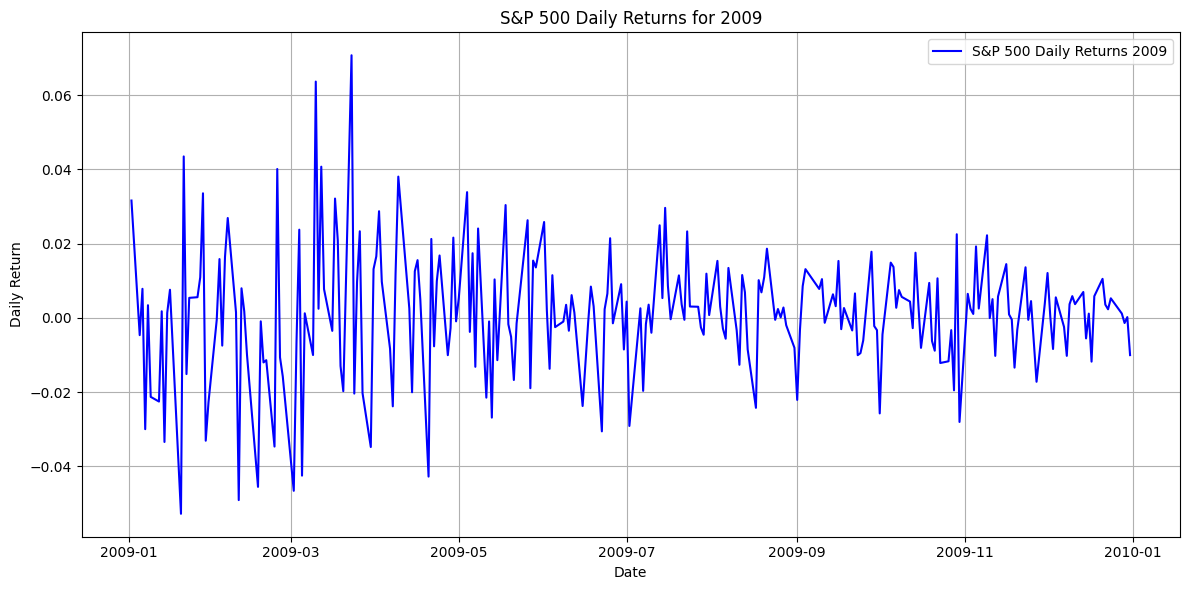

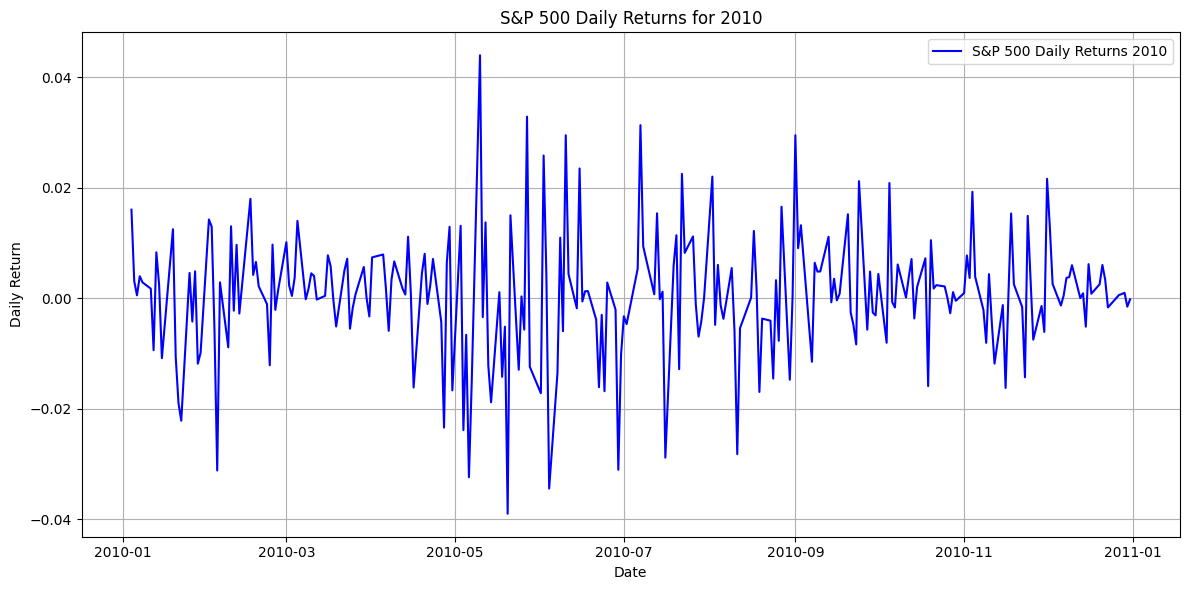

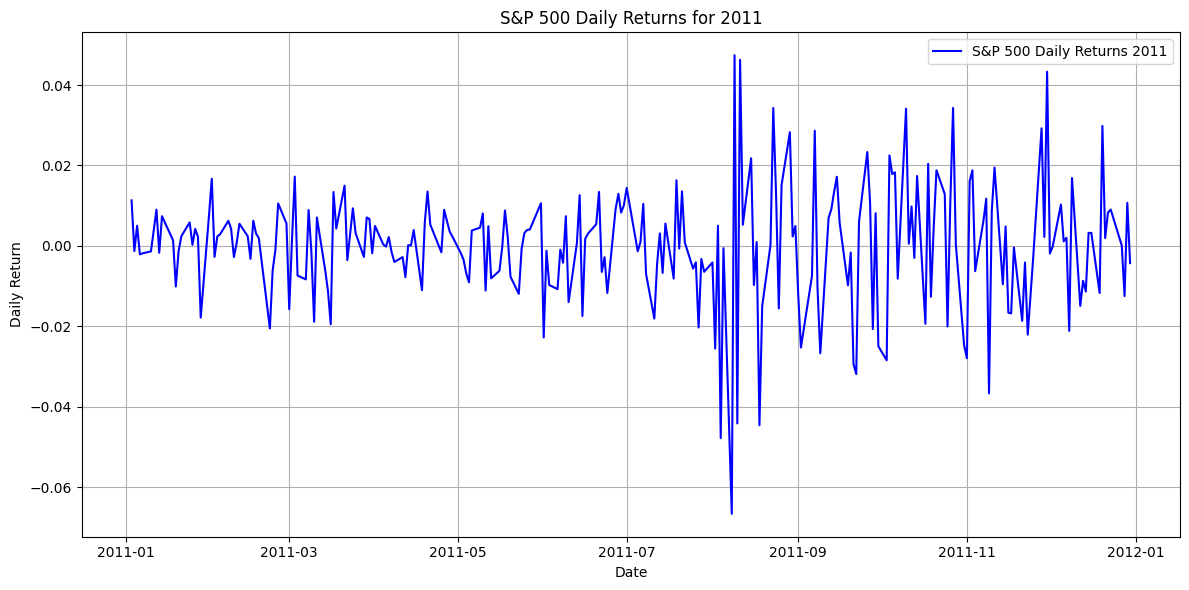

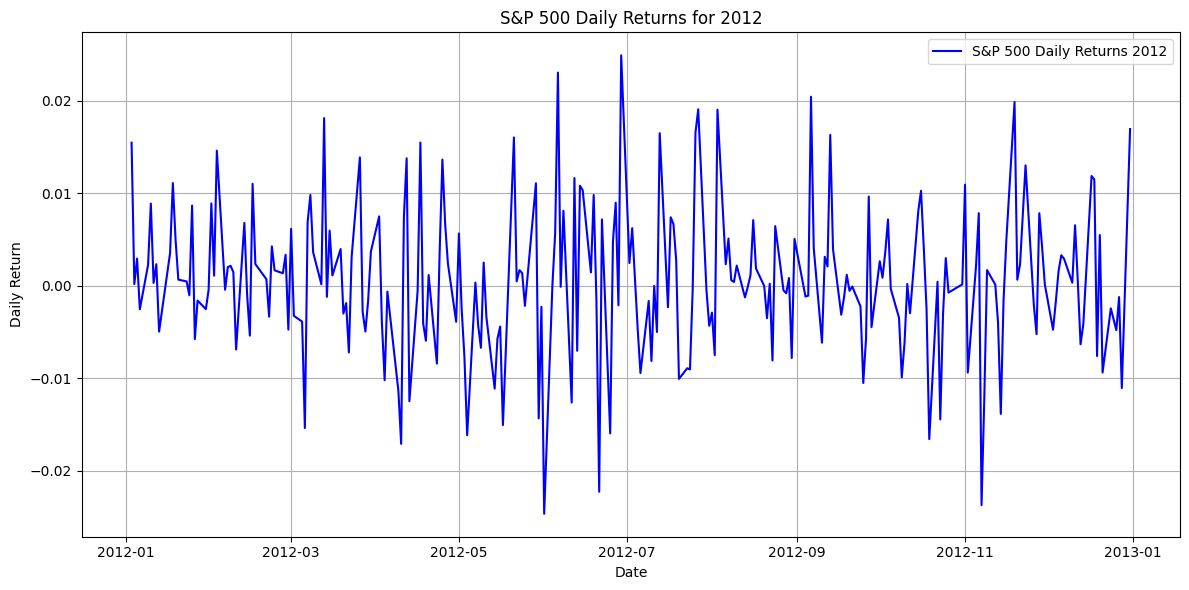

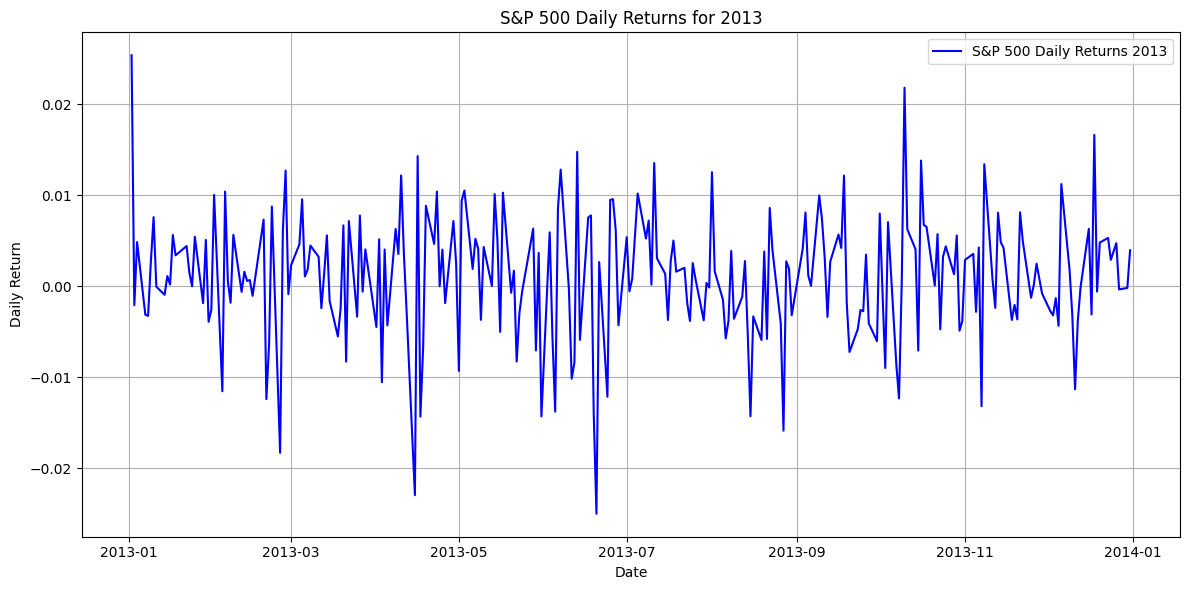

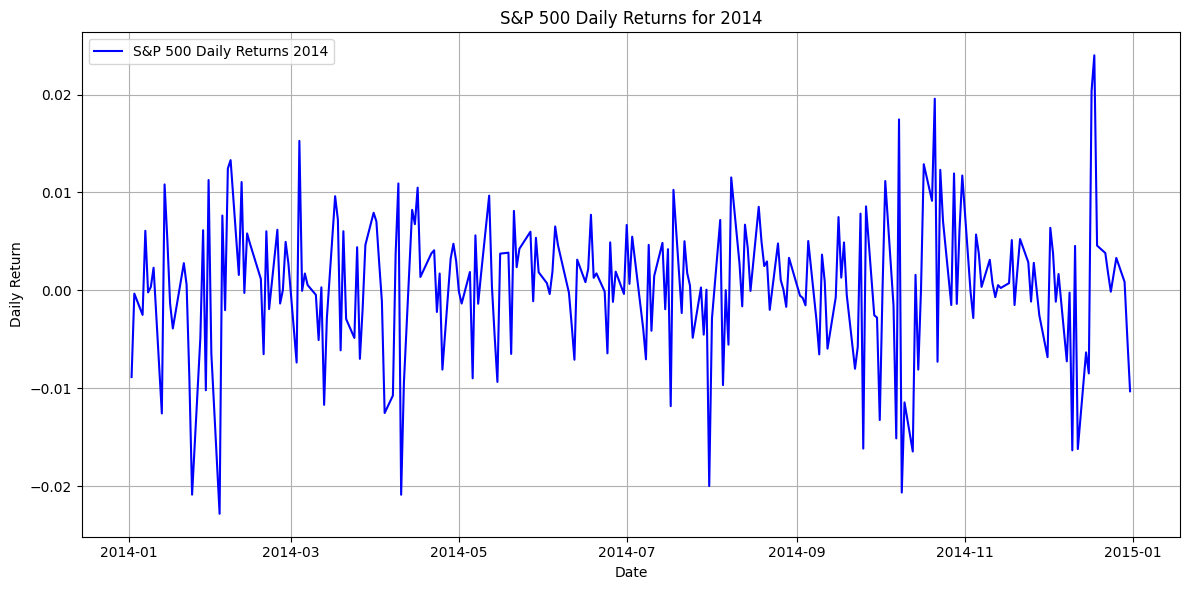

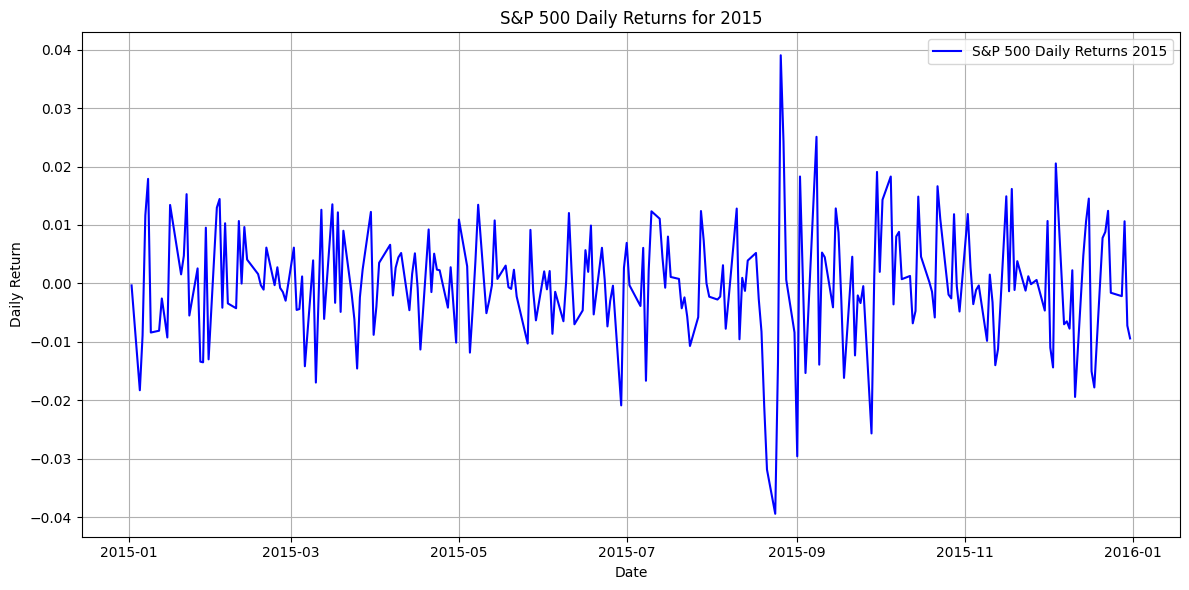

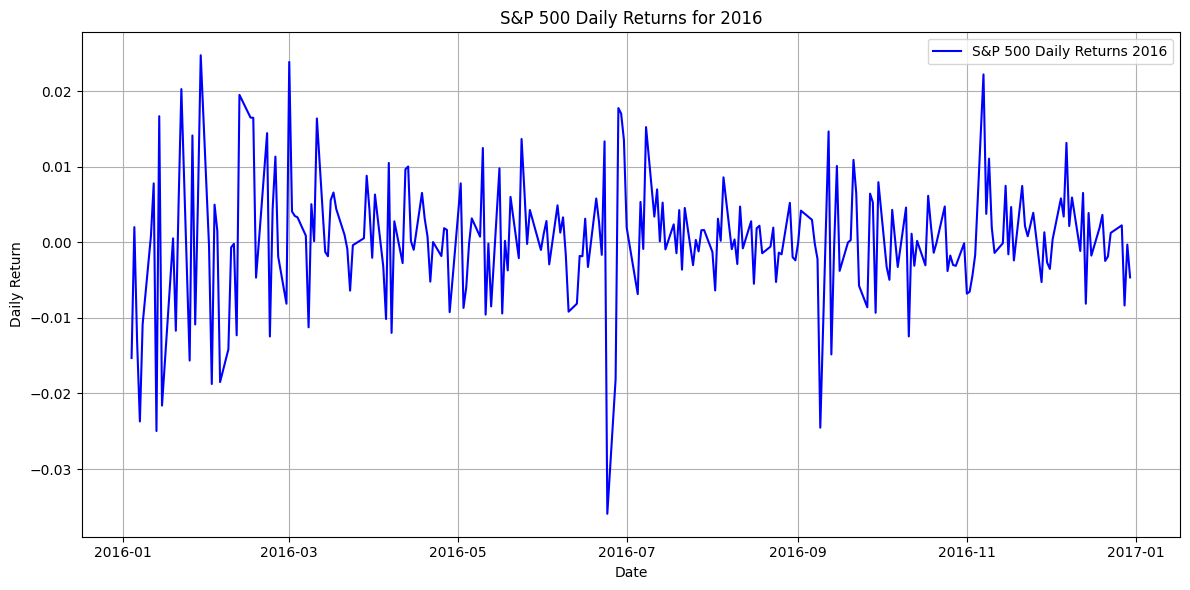

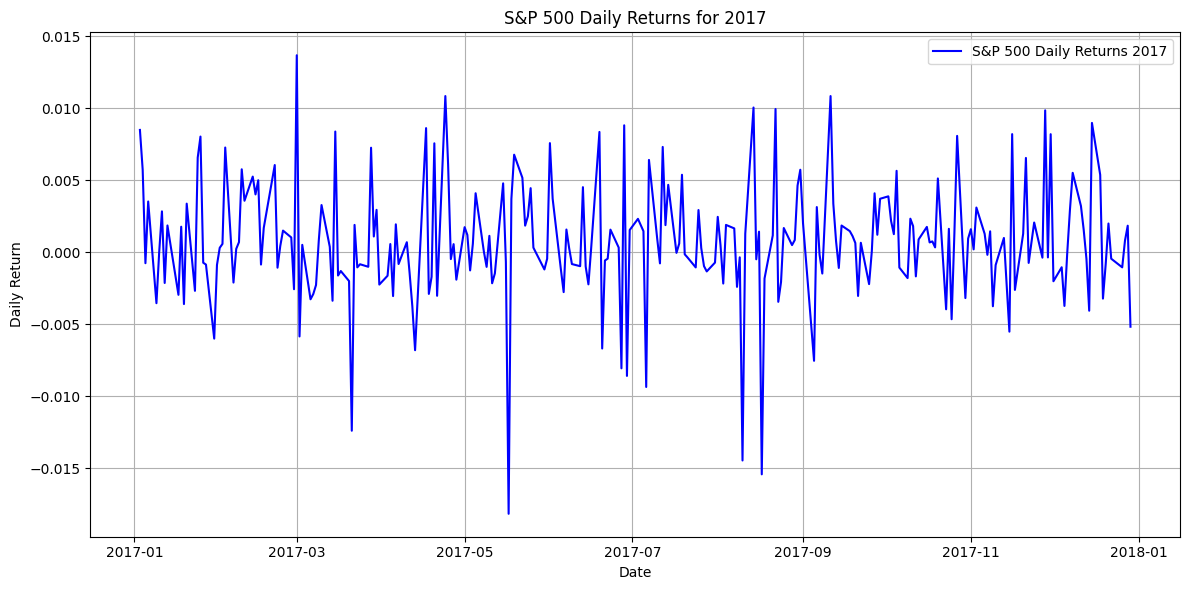

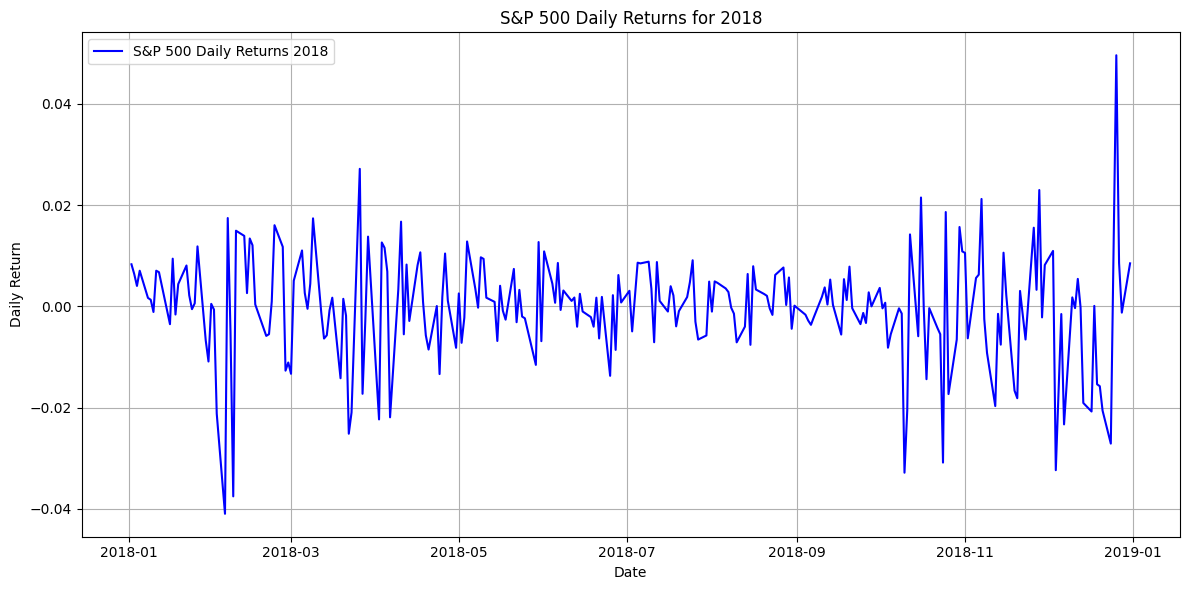

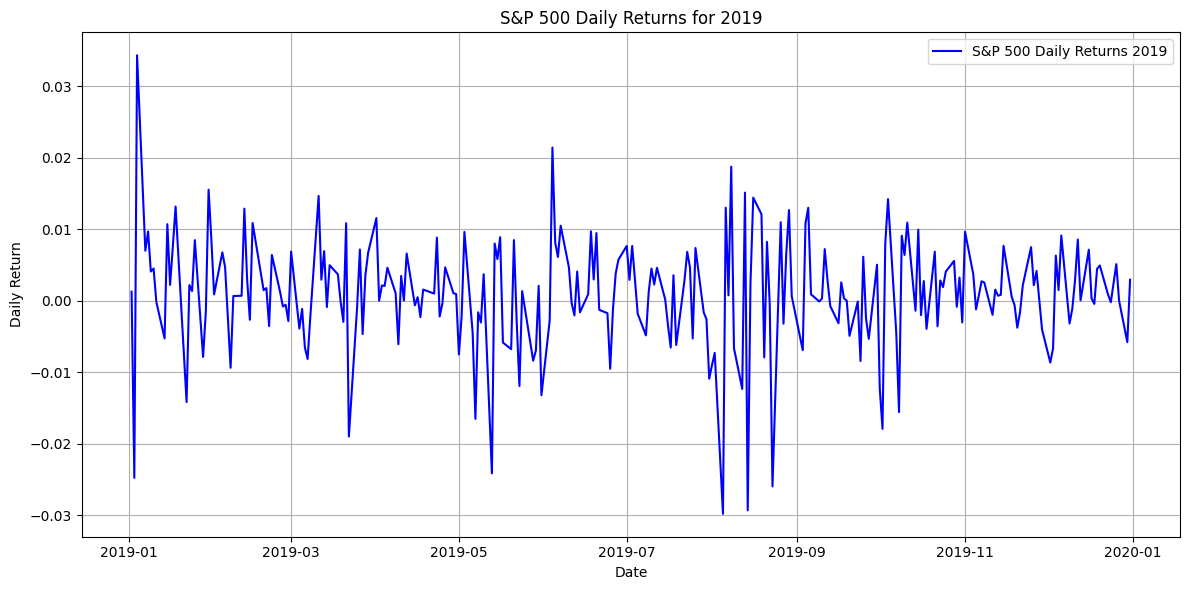

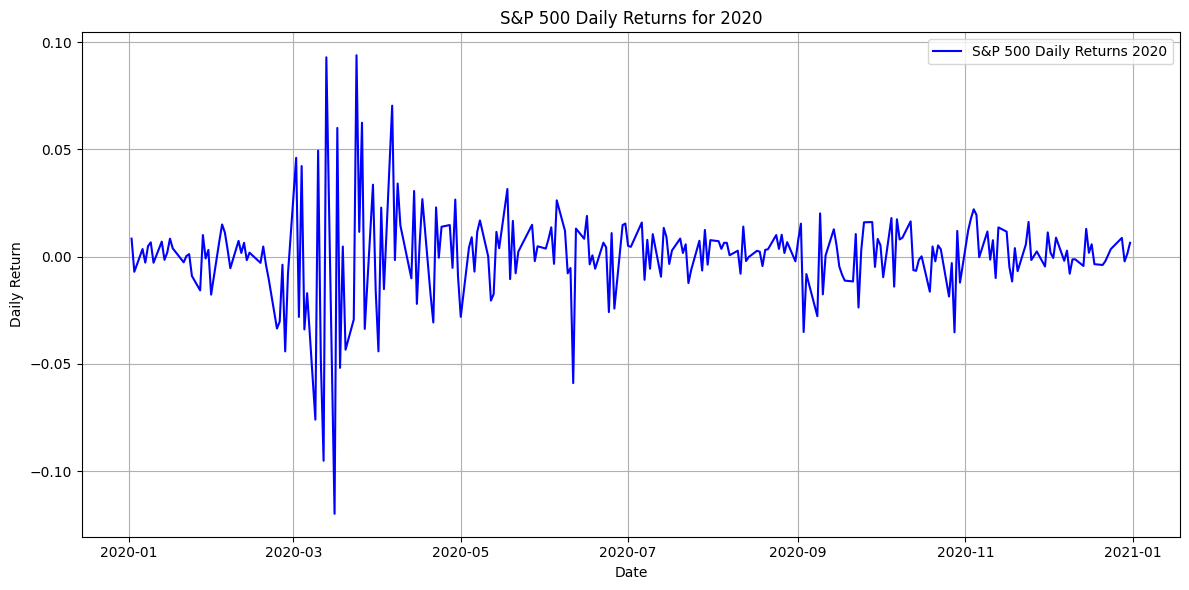

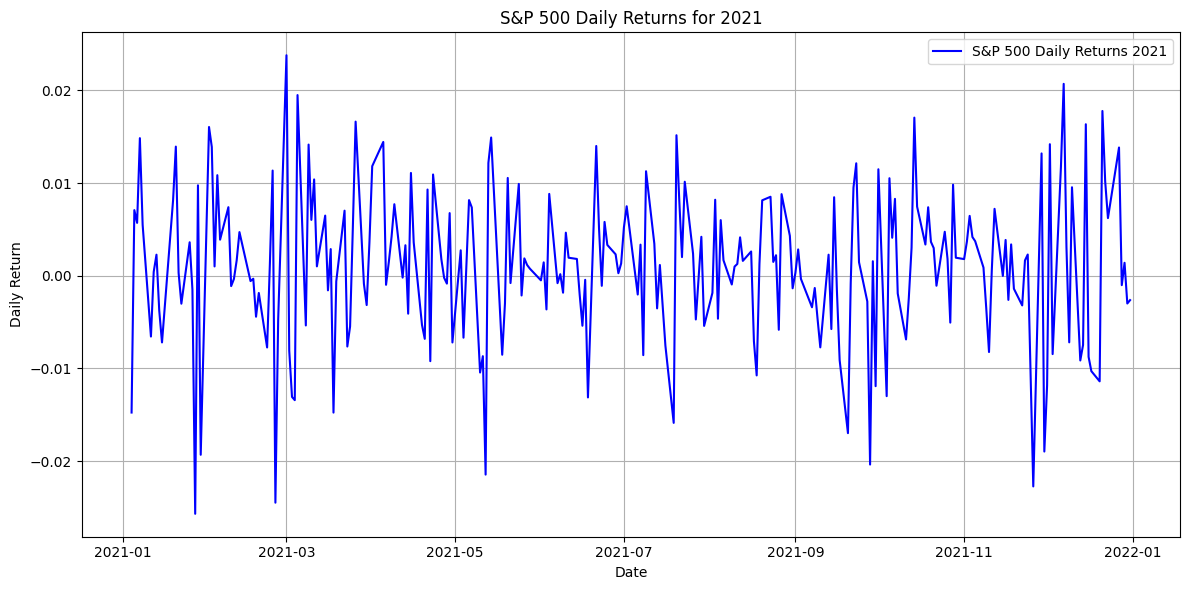

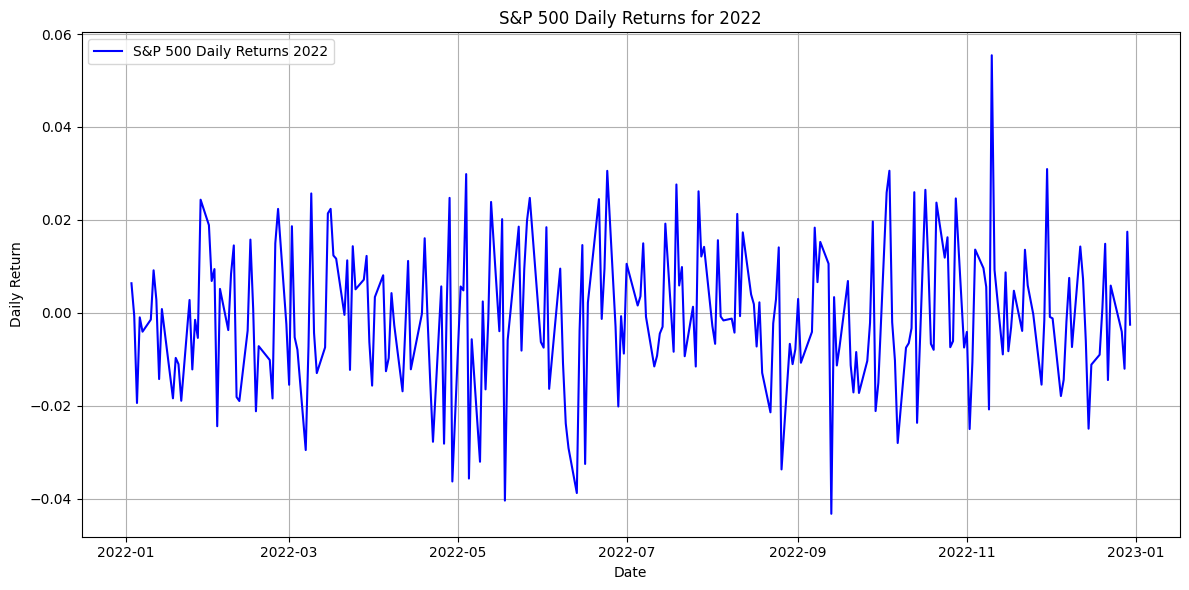

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the S&P 500 ticker symbol
spx_symbol = "^GSPC"

# Download historical SPX data from Yahoo Finance
spx_data = yf.download(spx_symbol, start="1973-01-01", end="2022-12-31")

# Calculate daily returns
spx_data['Daily_Return'] = spx_data['Adj Close'].pct_change()

# Extract the year from the date
spx_data['Year'] = spx_data.index.year

# Get unique years in the data
unique_years = spx_data['Year'].unique()

# Create separate line charts for each year's returns
for year in unique_years:
    year_data = spx_data[spx_data['Year'] == year]

    plt.figure(figsize=(12, 6))
    plt.plot(year_data.index, year_data['Daily_Return'], label=f'S&P 500 Daily Returns {year}', color='b')
    plt.title(f'S&P 500 Daily Returns for {year}')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')
    plt.grid()
    plt.legend()
    plt.tight_layout()

    plt.show()
